# <span style="background-color:white; color:black;"> Evidence-based Cricket analytics</span>

## `Problem Statement:`
### To evaluate the performance of Indian men’s cricket players in the **`Test`** format across the world during the period 2013–2022, and to identify the most effective role-based combination of players that forms the best possible Playing XI using data-driven analytics.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Transformation

In [3]:
df_batters=pd.read_csv('test_batters_performance.csv')
df_batters.head()

,Player Name,Span,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s
0,V Kohli,2013-2022,90,152,9,7228,254*,50.54,12681,56.99,24,23,12,809,20
1,CA Pujara,2013-2022,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14
2,AM Rahane,2013-2022,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34
3,M Vijay,2013-2018,49,85,1,3373,167,40.15,7345,45.92,11,13,7,399,30
4,RG Sharma,2013-2022,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64


In [4]:
# Changing few names of the players for better reference.

df_batters['Player Name']=df_batters['Player Name'].str.replace('RG Sharma','Rohit Sharma')\
    .str.replace('M Vijay','Murali Vijay').str.replace('RR Pant','Rishab Pant')

In [5]:
df_batters['Player Name'].unique()

array(['V Kohli', 'CA Pujara', 'AM Rahane', 'Murali Vijay',
       'Rohit Sharma', 'KL Rahul', 'RA Jadeja', 'R Ashwin', 'S Dhawan',
       'Rishab Pant', 'MA Agarwal', 'WP Saha', 'MS Dhoni', 'GH Vihari',
       'Shubman Gill', 'Mohammed Shami', 'SS Iyer', 'B Kumar',
       'HH Pandya', 'UT Yadav', 'KK Nair', 'I Sharma', 'PP Shaw',
       'SR Tendulkar', 'Washington Sundar', 'A Mishra', 'SN Thakur',
       'PA Patel', 'AR Patel', 'J Yadav', 'JJ Bumrah', 'STR Binny',
       'G Gambhir', 'A Mukund', 'Kuldeep Yadav', 'Z Khan',
       'Mohammed Siraj', 'NV Ojha', 'Harbhajan Singh', 'VR Aaron',
       'V Sehwag', 'JD Unadkat', 'KD Karthik', 'Pankaj Singh', 'NA Saini',
       'KV Sharma', 'PP Ojha', 'S Nadeem', 'T Natarajan', 'SK Raina'],
      dtype=object)

In [6]:
# Adding the players batting style column to make sure we filter a team that is well balanced with left and right handed batsmen.
# Ive took the help of "Chatgpt" to search and identify wether each player is a left or right handed batsmen.

# Manual batting handedness mapping for your players
batting_style_map = {
    'V Kohli': 'RHB',
    'CA Pujara': 'RHB',
    'AM Rahane': 'RHB',
    'Murali Vijay': 'RHB',
    'Rohit Sharma': 'RHB',
    'KL Rahul': 'RHB',
    'RA Jadeja': 'LHB',
    'R Ashwin': 'RHB',
    'S Dhawan': 'LHB',
    'Rishab Pant': 'LHB',
    'MA Agarwal': 'RHB',
    'WP Saha': 'RHB',
    'MS Dhoni': 'RHB',
    'GH Vihari': 'RHB',
    'Shubman Gill': 'RHB',
    'Mohammed Shami': 'RHB',
    'SS Iyer': 'RHB',
    'B Kumar': 'RHB',
    'HH Pandya': 'RHB',
    'UT Yadav': 'RHB',
    'KK Nair': 'RHB',
    'I Sharma': 'RHB',
    'PP Shaw': 'RHB',
    'SR Tendulkar': 'RHB',
    'Washington Sundar': 'LHB',
    'A Mishra': 'RHB',
    'SN Thakur': 'RHB',
    'PA Patel': 'LHB',
    'AR Patel': 'LHB',
    'J Yadav': 'RHB',
    'JJ Bumrah': 'RHB',
    'STR Binny': 'RHB',
    'G Gambhir': 'LHB',
    'A Mukund': 'LHB',
    'Kuldeep Yadav': 'LHB',
    'Z Khan': 'RHB',
    'Mohammed Siraj': 'RHB',
    'NV Ojha': 'RHB',
    'Harbhajan Singh': 'RHB',
    'VR Aaron': 'RHB',
    'V Sehwag': 'RHB',
    'JD Unadkat': 'RHB',
    'KD Karthik': 'RHB',
    'Pankaj Singh': 'RHB',
    'NA Saini': 'RHB',
    'KV Sharma': 'LHB',
    'PP Ojha': 'LHB',
    'S Nadeem': 'RHB',
    'T Natarajan': 'LHB',
    'SK Raina': 'LHB'
}


df_batters['Batting_Style'] = df_batters['Player Name'].map(batting_style_map)


df_batters.head()


,Player Name,Span,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style
0,V Kohli,2013-2022,90,152,9,7228,254*,50.54,12681,56.99,24,23,12,809,20,RHB
1,CA Pujara,2013-2022,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14,RHB
2,AM Rahane,2013-2022,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB
3,Murali Vijay,2013-2018,49,85,1,3373,167,40.15,7345,45.92,11,13,7,399,30,RHB
4,Rohit Sharma,2013-2022,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB


In [7]:
df_batters.isna().sum()

Player Name      0
Span             0
Matches          0
Innings          0
Not Outs         0
Runs             0
Highest Score    0
Avg              0
Balls Faced      0
Strike Rate      0
100              0
50               0
0                0
4s               0
6s               0
Batting_Style    0
dtype: int64

In [8]:
df_batters.shape

(50, 16)

In [9]:
df_batters.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Player Name    50 non-null     object 
 1   Span           50 non-null     object 
 2   Matches        50 non-null     int64  
 3   Innings        50 non-null     int64  
 4   Not Outs       50 non-null     int64  
 5   Runs           50 non-null     int64  
 6   Highest Score  50 non-null     object 
 7   Avg            50 non-null     object 
 8   Balls Faced    50 non-null     int64  
 9   Strike Rate    50 non-null     float64
 10  100            50 non-null     int64  
 11  50             50 non-null     int64  
 12  0              50 non-null     int64  
 13  4s             50 non-null     int64  
 14  6s             50 non-null     int64  
 15  Batting_Style  50 non-null     object 
dtypes: float64(1), int64(10), object(5)
memory usage: 6.4+ KB


In [10]:
df_batters.duplicated().sum() # No duplicates

np.int64(0)

In [11]:
df_batters.dtypes 

Player Name       object
Span              object
Matches            int64
Innings            int64
Not Outs           int64
Runs               int64
Highest Score     object
Avg               object
Balls Faced        int64
Strike Rate      float64
100                int64
50                 int64
0                  int64
4s                 int64
6s                 int64
Batting_Style     object
dtype: object

In [12]:
# Observed that in "Avg" column there is a string "-" , replaced it with "0" as we are going to convert it to float later.
df_batters['Avg']=df_batters['Avg'].str.replace('-','0')

# Observed that in "Highest Score" Column there are notout symbols "*" for few score, hence we removed them for better transition of dtype.
df_batters['Highest Score']=df_batters['Highest Score'].str.replace('*','')

In [13]:
# Converting dtype of "Avg" column to float and "Highest Score" column to int.

df_batters['Avg']=df_batters['Avg'].astype('float64')

df_batters['Highest Score']=df_batters['Highest Score'].astype('int64')

df_batters.dtypes

Player Name       object
Span              object
Matches            int64
Innings            int64
Not Outs           int64
Runs               int64
Highest Score      int64
Avg              float64
Balls Faced        int64
Strike Rate      float64
100                int64
50                 int64
0                  int64
4s                 int64
6s                 int64
Batting_Style     object
dtype: object

In [14]:
# Converting "Span" column to two new columns namely "Start_Year" and "End_Year"

df_batters[['Start_Year','End_Year']]=df_batters['Span'].str.split('-',expand=True)

df_batters['Start_Year']=df_batters['Start_Year'].astype('int')
df_batters['End_Year']=df_batters['End_Year'].astype('int')

df_batters.dtypes

Player Name       object
Span              object
Matches            int64
Innings            int64
Not Outs           int64
Runs               int64
Highest Score      int64
Avg              float64
Balls Faced        int64
Strike Rate      float64
100                int64
50                 int64
0                  int64
4s                 int64
6s                 int64
Batting_Style     object
Start_Year         int64
End_Year           int64
dtype: object

In [15]:
# Removing Span column

df_batters=df_batters.drop(columns='Span')
df_batters.head()

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year
0,V Kohli,90,152,9,7228,254,50.54,12681,56.99,24,23,12,809,20,RHB,2013,2022
1,CA Pujara,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14,RHB,2013,2022
2,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022
3,Murali Vijay,49,85,1,3373,167,40.15,7345,45.92,11,13,7,399,30,RHB,2013,2018
4,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022


### Outliers

<Axes: >

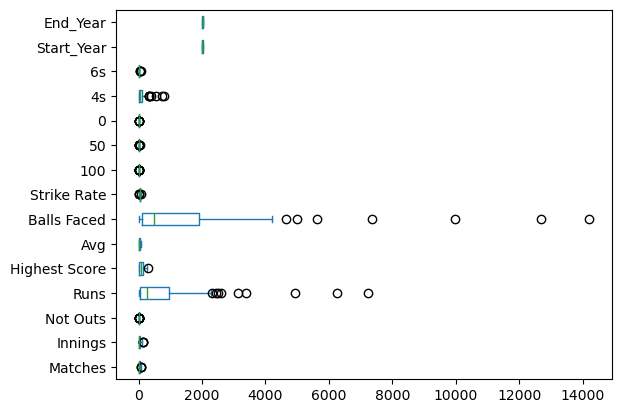

In [16]:
# As senior and best players exist with larger values(Greater Stats), there is no problem of having outliers for this dataset.

df_batters.plot(kind='box',vert=False) 

In [17]:
catg_columns=df_batters.select_dtypes(exclude=[np.number,np.float64]).columns
catg_columns

Index(['Player Name', 'Batting_Style'], dtype='object')

In [18]:
num_cols=df_batters.select_dtypes(include=[np.number,np.float64]).columns
num_cols

Index(['Matches', 'Innings', 'Not Outs', 'Runs', 'Highest Score', 'Avg',
       'Balls Faced', 'Strike Rate', '100', '50', '0', '4s', '6s',
       'Start_Year', 'End_Year'],
      dtype='object')

In [19]:
df_batters[num_cols].max()

Matches             90.00
Innings            153.00
Not Outs            25.00
Runs              7228.00
Highest Score      303.00
Avg                 66.25
Balls Faced      14212.00
Strike Rate         86.04
100                 24.00
50                  33.00
0                   19.00
4s                 809.00
6s                  64.00
Start_Year        2022.00
End_Year          2022.00
dtype: float64

In [20]:
df_batters[num_cols].min()

Matches             1.0
Innings             1.0
Not Outs            0.0
Runs                0.0
Highest Score       0.0
Avg                 0.0
Balls Faced         4.0
Strike Rate         0.0
100                 0.0
50                  0.0
0                   0.0
4s                  0.0
6s                  0.0
Start_Year       2013.0
End_Year         2013.0
dtype: float64

# What Kind of Batting order We are Looking For?
1. **`RHB`** – Aggressive/Resilient Opener
2. **`LHB`** – Technical Opener
3. **`RHB`** – Anchor / Captian
4. **`RHB`** – Red-Ball Specialist / Defensive Anchor
5. **`LHB`** – WK/Flexible Middle Order

## Finding Senior Elite Batters(Left and Right handed) from the Dataset Using Thresholds.

In [21]:
df_batters.head()

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year
0,V Kohli,90,152,9,7228,254,50.54,12681,56.99,24,23,12,809,20,RHB,2013,2022
1,CA Pujara,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14,RHB,2013,2022
2,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022
3,Murali Vijay,49,85,1,3373,167,40.15,7345,45.92,11,13,7,399,30,RHB,2013,2018
4,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022


In [22]:
# Setting Thresholds to filter out elite batsmen for senior group.

df_senior_elite_batters_right=df_batters[
    (df_batters['Batting_Style']=='RHB') &
    (df_batters['Innings'] >= 70) &  
    (df_batters['Balls Faced'] >= 3000) &  
    (df_batters['Runs']>2500) &  
    (df_batters['Avg'] >=32) & 
    (df_batters['Start_Year']==2013) &
    (df_batters['End_Year']==2022) 
]

df_senior_elite_batters_right=df_senior_elite_batters_right.reset_index(drop=True)
df_senior_elite_batters_right

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year
0,V Kohli,90,152,9,7228,254,50.54,12681,56.99,24,23,12,809,20,RHB,2013,2022
1,CA Pujara,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14,RHB,2013,2022
2,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022
3,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022


In [23]:
df_senior_elite_batters_left=df_batters[(df_batters['Batting_Style']=='LHB') & (df_batters['End_Year']==2022)]
df_senior_elite_batters_left

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year
6,RA Jadeja,59,88,20,2511,175,36.92,4209,59.65,3,17,5,251,55,LHB,2013,2022
9,Rishab Pant,33,56,4,2271,159,43.67,3084,73.63,5,11,2,246,55,LHB,2018,2022
28,AR Patel,8,13,2,249,52,22.63,484,51.44,0,1,1,25,8,LHB,2021,2022
34,Kuldeep Yadav,8,9,0,94,40,10.44,299,31.43,0,0,3,11,0,LHB,2017,2022


**As there is no prominent left handed player who is a active and so good to Deserve a place as an **`Opener`** we would go with right and right hand combination as our openers.**

# Now Our Updated Aim for Batting Order:
1. **`RHB`** – Opener-1
2. **`RHB`** – Opener-2
3. **`RHB`** – Anchor / Captian
4. **`RHB`** – Red-Ball Specialist / Defensive Anchor
5. **`LHB`** – WK/Flexible Middle Order

In [24]:
# Adding Rishab Pant into Senior group for analysis as he is the only WicketKeeper Batsmen who has good stats and an active player.
#df_rpant=df_senior_elite_batters_left[df_senior_elite_batters_left['Player Name']=='Rishab Pant']

#df_senior_elite_batters=pd.concat([df_senior_elite_batters_right,df_rpant],ignore_index=True)
#df_senior_elite_batters

In [25]:
# Calculating "Balls faced per innings" for Better analysis.

df_senior_elite_batters_right["Balls_per_innings"] = (df_senior_elite_batters_right["Balls Faced"] / df_senior_elite_batters_right["Innings"]).astype('int')
df_senior_elite_batters_right

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings
0,V Kohli,90,152,9,7228,254,50.54,12681,56.99,24,23,12,809,20,RHB,2013,2022,83
1,CA Pujara,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14,RHB,2013,2022,92
2,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022,71
3,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022,73


In [26]:
df_batters['Start_Year'].mean()

np.float64(2015.78)

In [27]:
len(df_batters[df_batters['Start_Year']>=2014])

33

## There are almost `33 Batters` who started their `Test Carrer` in the year `2014` and above, so we cannot compare them with `Senior Elite Batters` using the same Thresholds, Hence we filter these Batters with Different Thresholds.

## Finding  Elite Batters from the year 2014 and above Using Thresholds.

In [28]:
# Sorting Junior_batters who debuted in 2014 or above.

junior_batters_df=df_batters[df_batters['Start_Year']>=2014]
junior_batters_df.head()

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year
5,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022
9,Rishab Pant,33,56,4,2271,159,43.67,3084,73.63,5,11,2,246,55,LHB,2018,2022
10,MA Agarwal,21,36,0,1488,243,41.33,2782,53.48,4,6,1,189,28,RHB,2018,2022
11,WP Saha,38,52,10,1279,117,30.45,2755,46.42,3,6,5,124,13,RHB,2014,2021
13,GH Vihari,16,28,3,839,111,33.56,1988,42.20,1,5,1,107,2,RHB,2018,2022


In [29]:
# Adding a new column -->'Balls_per_innings' for better analysis of the players

junior_batters_df['Balls_per_innings']=(junior_batters_df['Balls Faced'])/(junior_batters_df['Innings']) 

# observed players with "0" Innings , hence it ruins the data type conversion so we took care of -infinity and +infinity values by setting them to "0".
junior_batters_df['Balls_per_innings'] = (
    junior_batters_df['Balls_per_innings']
    .replace([np.inf, -np.inf], np.nan)
    .fillna(0)
    .astype(int)
)

junior_batters_df.head()

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings
5,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022,64
9,Rishab Pant,33,56,4,2271,159,43.67,3084,73.63,5,11,2,246,55,LHB,2018,2022,55
10,MA Agarwal,21,36,0,1488,243,41.33,2782,53.48,4,6,1,189,28,RHB,2018,2022,77
11,WP Saha,38,52,10,1279,117,30.45,2755,46.42,3,6,5,124,13,RHB,2014,2021,52
13,GH Vihari,16,28,3,839,111,33.56,1988,42.20,1,5,1,107,2,RHB,2018,2022,71


In [30]:
## New Thresholds for Junior Elite Batters.

df_junior_elite_batters= junior_batters_df[
    
    (junior_batters_df['Balls_per_innings']>=55) &
    (junior_batters_df['Innings']>30) &
    (junior_batters_df['Balls Faced']>2500) &
    (junior_batters_df['Avg']>32) &
    (junior_batters_df['Runs']>1200) &
    (junior_batters_df['Start_Year']>=2014) &
    (junior_batters_df['End_Year']==2022) 
    
]

df_junior_elite_batters

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings
5,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022,64
9,Rishab Pant,33,56,4,2271,159,43.67,3084,73.63,5,11,2,246,55,LHB,2018,2022,55
10,MA Agarwal,21,36,0,1488,243,41.33,2782,53.48,4,6,1,189,28,RHB,2018,2022,77


## Now We combine Both senior & Junior Elite Batters list for Final Selection.

In [31]:
df_elite_batters=pd.concat([df_senior_elite_batters_right,df_junior_elite_batters],ignore_index=True)

df_elite_batters

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings
0,V Kohli,90,152,9,7228,254,50.54,12681,56.99,24,23,12,809,20,RHB,2013,2022,83
1,CA Pujara,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14,RHB,2013,2022,92
2,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022,71
3,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022,73
4,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022,64
5,Rishab Pant,33,56,4,2271,159,43.67,3084,73.63,5,11,2,246,55,LHB,2018,2022,55
6,MA Agarwal,21,36,0,1488,243,41.33,2782,53.48,4,6,1,189,28,RHB,2018,2022,77


## Ploting the Players stats for better Understanding of each players performance.(Univariate/Bivariate/Multivariate)

Text(0.5, 1.0, 'Batsmen Average')

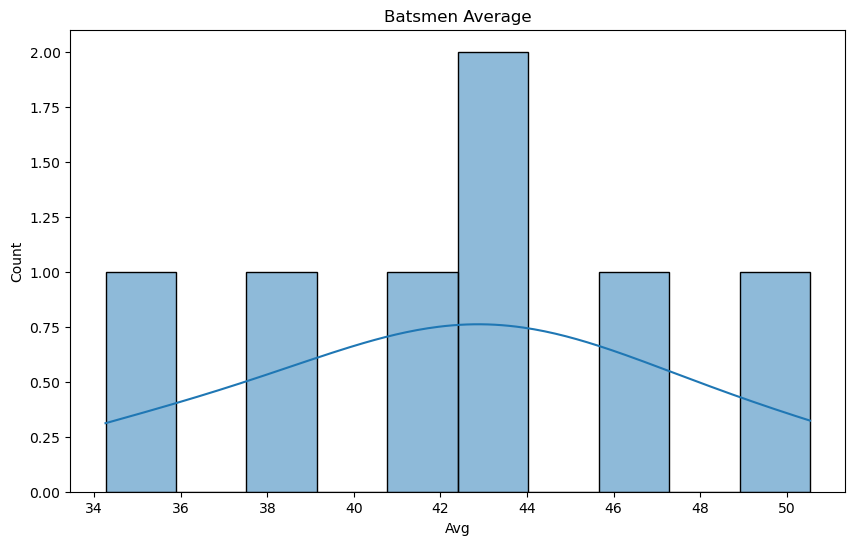

In [32]:
# Avg column analysis.
plt.figure(figsize=(10,6))
sns.histplot(df_elite_batters['Avg'], kde=True,bins=10)
plt.title('Batsmen Average')

**We can see most of the players in elite group fall between 40-44 of batting average.**

Text(0.5, 0, '')

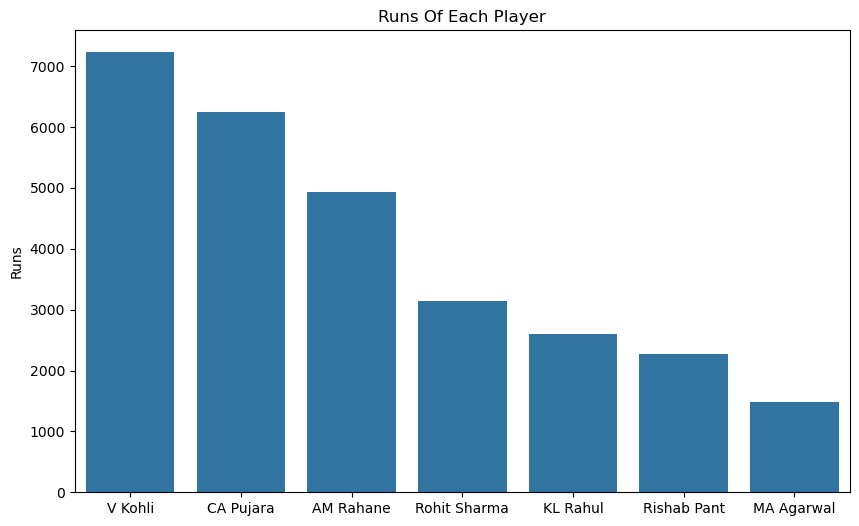

In [33]:
# Runs column Analysis.
plt.figure(figsize=(10,6))
sns.barplot(x='Player Name', y='Runs', data=df_elite_batters)
plt.title('Runs Of Each Player')
plt.xlabel('')

**We can See most of the players scored around 2500 runs, but only two have crossed 6000 runs, and only Virat has 7000+ runs.**

Text(0.5, 0, '')

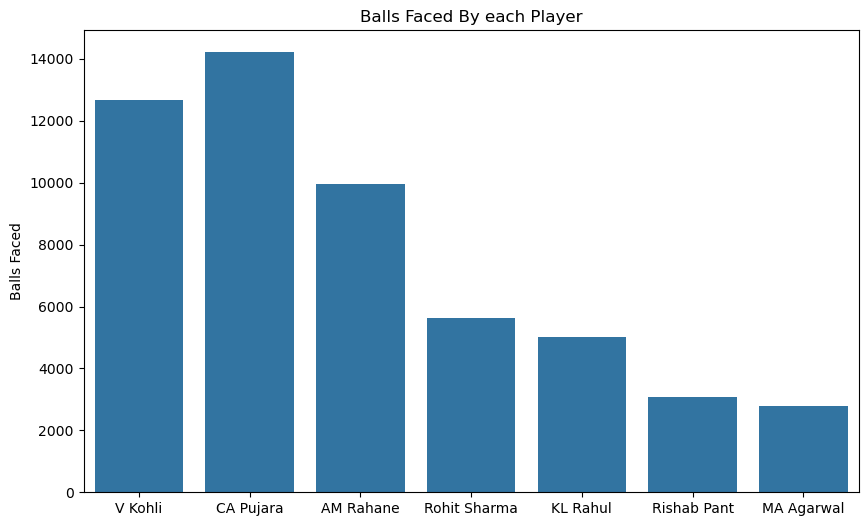

In [34]:
# Ball Faced by each batter.
plt.figure(figsize=(10,6))
sns.barplot(x='Player Name', y='Balls Faced', data=df_elite_batters)
plt.title('Balls Faced By each Player')
plt.xlabel('')

**We can see Virat Kohli and Pujara are the only ones who faced more than 12000 balls.**

Text(0.5, 0, '')

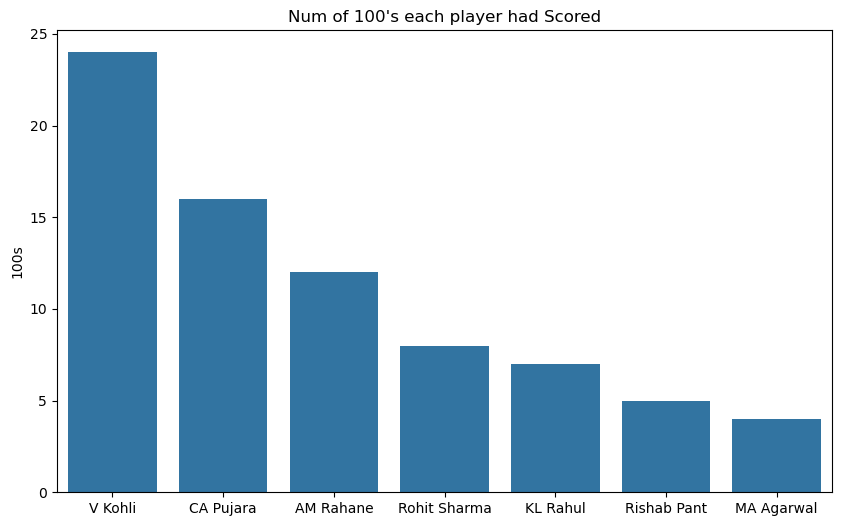

In [35]:
# Visualizing How many 100's each player have scored.
plt.figure(figsize=(10,6))
sns.barplot(x='Player Name', y='100', data=df_elite_batters)
plt.title("Num of 100's each player had Scored")
plt.ylabel('100s')
plt.xlabel('')

**We can observe that most of the players have scored more than 5 Centuries aginst all the teams, while virat and pujara have scored more than 15 centuries.**

Text(0.5, 0, '')

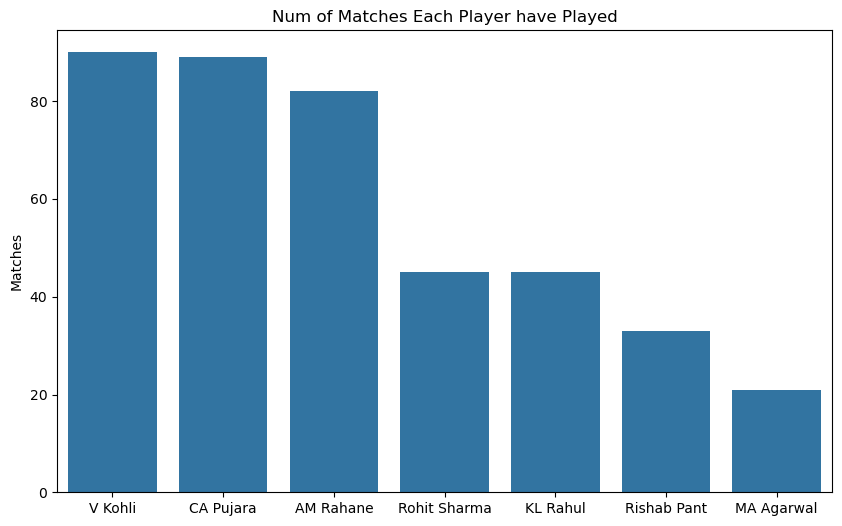

In [36]:
# Analysing how many matches each player have played(Experience).
plt.figure(figsize=(10,6))
sns.barplot(data=df_elite_batters,x='Player Name',y='Matches')
plt.title('Num of Matches Each Player have Played')
plt.xlabel('')

**Most of the players have played around 40 matches, while Virat and Pujara stands tall by playing more than 80 Test matches across the Globe!**

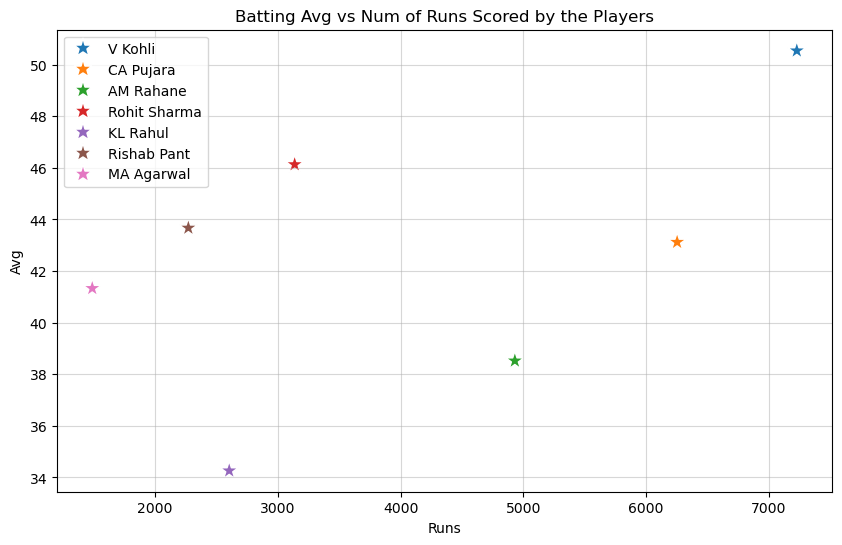

In [37]:
# Average vs Runs (Quality vs Volume)
plt.figure(figsize=(10,6))
sns.scatterplot(x='Runs', y='Avg', data=df_elite_batters, hue='Player Name',marker='*',s=200)
plt.title('Batting Avg vs Num of Runs Scored by the Players')
plt.legend(loc=0)
plt.grid(alpha=0.5)

**We can Observe that Virat Kohli stands apart from everyone by having Avg more than 50 with 7000+ runs and meanwhile Pujara is the only one who is near his avg and runs**

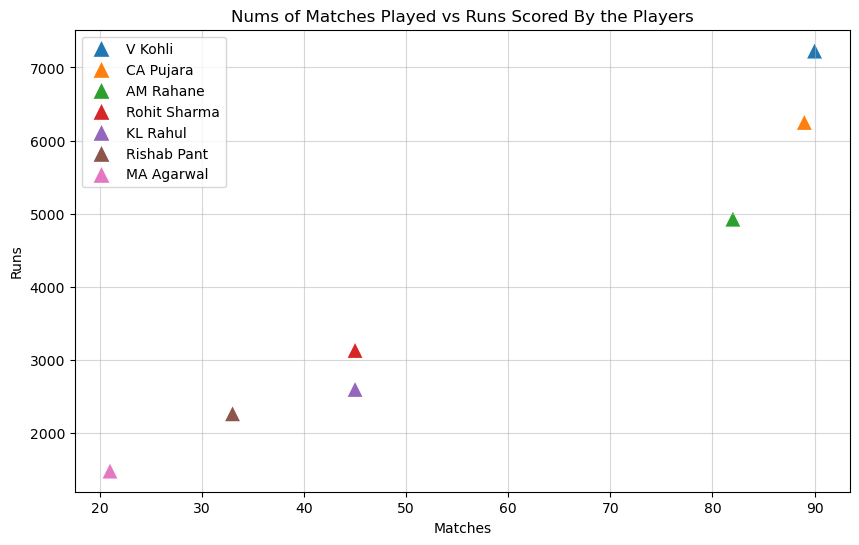

In [38]:
# Matches played vs Runs Scored.
plt.figure(figsize=(10,6))
sns.scatterplot(x='Matches', y='Runs',data=df_elite_batters, hue='Player Name',marker='^',s=150)

plt.title('Nums of Matches Played vs Runs Scored By the Players')
plt.legend(loc=0)
plt.grid(alpha=0.5)

**We can see the top 4 players from the scatter plot who are most experienced in Matches as well as scoring runs--> Virat,Pujara,Rahane and Rohit Sharma.**

## <span style="color:orange; font-weight:bold;">I think by now we can Come to a Conclusion of few players who deserves a place in the Team.</span>
- Whatever the analysis is `Virat Kohli` Dominated everyone in the team standing tall in this Format, hence we have to consider his name first and the remaining next.
- We can also Consider `Virat Kohli` as the `Captian(C)`  for this format based on his outstanding stats and experince of hanlding the situations across this format.

- Followed by another consistent player in this format across the Globe is `Cheteshwar Pujara`, we would also consider him in our Top order.
-  And Desperately We are selecting `Rishab Pant` also in the middle order because a left hand top order batsmen should be must and that too he is a wicket keeper and hence his place is crucial in changing the entire strategy of the opposition.

### <span style="color:orange; font-weight:bold;">Why Left Hand Wicket Keeper Batsmen?</span>
- Breaks the Bowler’s Line & Length
- Left-Right Combination = Tough to Set Fields
- Changes Spin Match-up Advantage
- Invaluable if Wicket-Keeper is a Left-Hander:  A left-hand wicketkeeper batter adds balance to the lineup without using extra batting slot.
- Opens Power Hitting Angles

In [39]:
# Removing Virat, Pujara, and Rishab Pant For Further Analysis as they were selected in the team.

df_elite_batters_filtered=df_elite_batters[~df_elite_batters['Player Name'].isin(['V Kohli','CA Pujara','Rishab Pant'])].reset_index(drop=True)
df_elite_batters_filtered

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings
0,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022,71
1,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022,73
2,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022,64
3,MA Agarwal,21,36,0,1488,243,41.33,2782,53.48,4,6,1,189,28,RHB,2018,2022,77


## Now the Analysis is for who will be the Openers and be as a Subtitue.

In [40]:
# For Further analysis we are including more measures as columns in the dataframe for better understanding of players performance.

# How many 50s become 100s?
df_elite_batters_filtered["Conversion_Ratio%"] = (df_elite_batters_filtered["100"] / (df_elite_batters_filtered["50"] + 1)*100).round(2)

# Boundary Percentage
df_elite_batters_filtered["Boundary%"] = (((df_elite_batters_filtered["4s"] + df_elite_batters_filtered["6s"]) / df_elite_batters_filtered["Runs"]) * 100).round(2)

df_elite_batters_filtered

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings,Conversion_Ratio%,Boundary%
0,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022,71,46.15,12.05
1,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022,73,53.33,12.72
2,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022,64,50.00,12.83
3,MA Agarwal,21,36,0,1488,243,41.33,2782,53.48,4,6,1,189,28,RHB,2018,2022,77,57.14,14.58


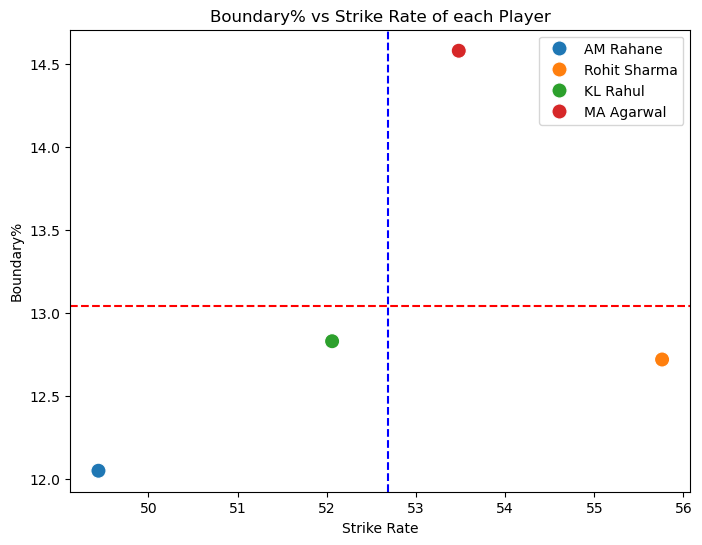

In [41]:
# Boundary% vs Strike Rate analysis
# High Strike Rate + High Boundary% → Explosive impact players

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_elite_batters_filtered, y='Boundary%', x='Strike Rate', hue='Player Name', s=120)

# Ploting ax-lines for understanding mean and median values so that we can filter out who did better easily.
plt.axvline(df_elite_batters_filtered['Strike Rate'].mean(), linestyle='--', color='blue')
plt.axhline(df_elite_batters_filtered['Boundary%'].mean(), linestyle='--', color='red')

plt.title('Boundary% vs Strike Rate of each Player')
plt.legend()

**Mayank Has Good Boundary% with decent strike rate while rohit has very good strike rate and falls just below the average in Boundary% Meanwhile others fall below the average lines.**

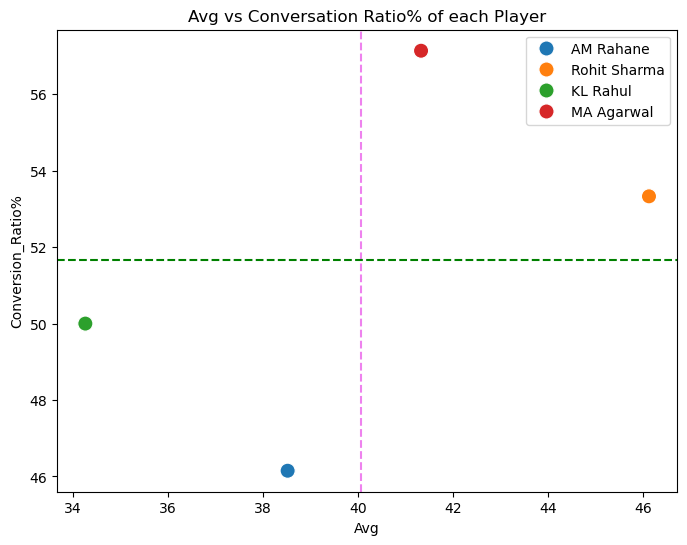

In [42]:
# Avg vs conversation_Ratio%
# Consistency + Ability to Convert → Long-term reliability.

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_elite_batters_filtered, x='Avg', y='Conversion_Ratio%', hue='Player Name', s=120)

plt.axvline(df_elite_batters_filtered['Avg'].mean(), linestyle='--', color='violet')
plt.axhline(df_elite_batters_filtered['Conversion_Ratio%'].mean(), linestyle='--', color='g')

plt.title('Avg vs Conversation Ratio% of each Player')
plt.legend()

**We can see that Rohit sharma and Mayank agrawal has good Conversation ratio(Above average), while others failed to cross the average mark in both the measures.**

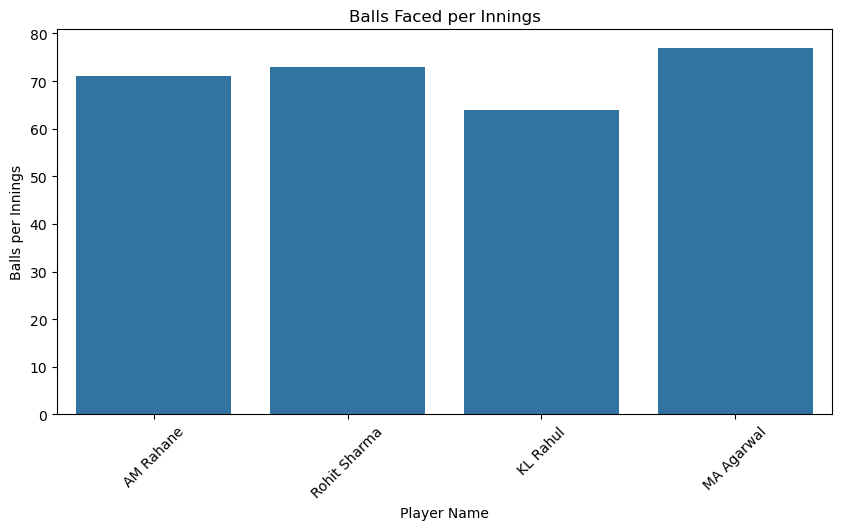

In [43]:
# Balls_per_innings column analysis
# Show the type of player--> High/Low Value

plt.figure(figsize=(10,5))
sns.barplot(x='Player Name', y='Balls_per_innings', data=df_elite_batters_filtered)

plt.title('Balls Faced per Innings')
plt.ylabel('Balls per Innings')
plt.xticks(rotation=45)
plt.show()


**We can Observe that Rohit and Mayank Faces More balls per innings than the other players --> Shows the type of players they are (High value)**

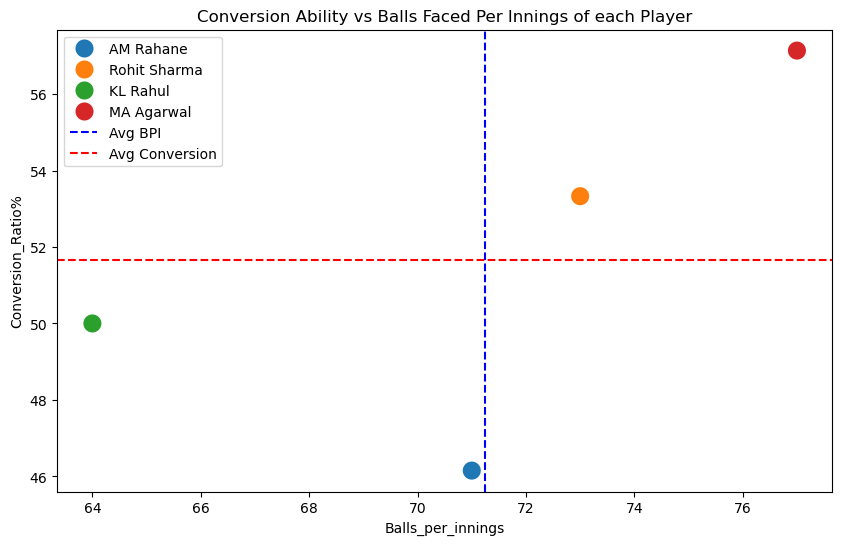

In [44]:
# Balls_per_innings vs Conversion Ratio% --> Patience vs Conversion

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_elite_batters_filtered,
                x='Balls_per_innings', y='Conversion_Ratio%', 
                hue='Player Name', s=200)

plt.axvline(df_elite_batters_filtered['Balls_per_innings'].mean(), color='blue', linestyle='--', label='Avg BPI')
plt.axhline(df_elite_batters_filtered['Conversion_Ratio%'].mean(), color='red', linestyle='--', label='Avg Conversion')

plt.title("Conversion Ability vs Balls Faced Per Innings of each Player")
plt.legend()
plt.show()

**Rohit and Mayank faced more Balls Per Innings with good Conversion Rate and meanwhile Rahane falled just below the avg mark in BPI and far from the avg mark of coversion rate.**

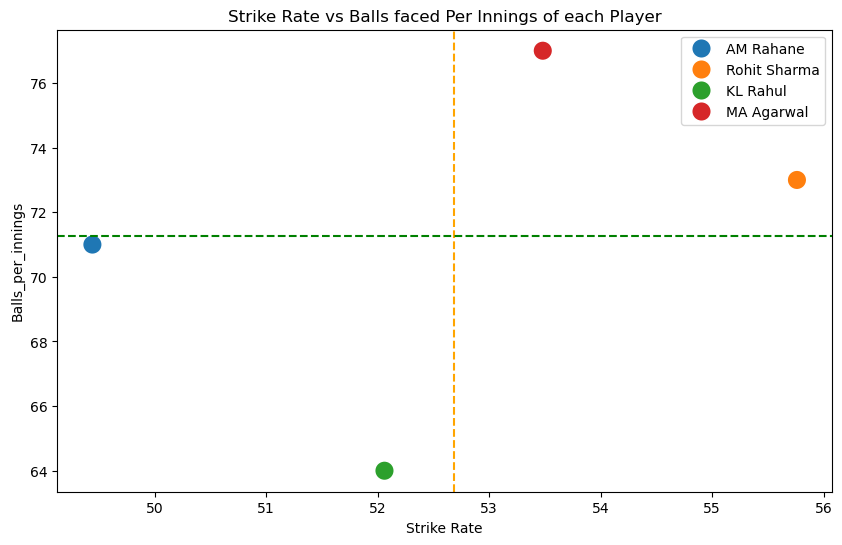

In [45]:
# Strike Rate vs Balls_per_innings--> Risk Factor Analysis

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_elite_batters_filtered,
                x='Strike Rate', y='Balls_per_innings',
                hue='Player Name', s=200)

plt.axvline(df_elite_batters_filtered['Strike Rate'].mean(), linestyle='--', color='orange')
plt.axhline(df_elite_batters_filtered['Balls_per_innings'].mean(), linestyle='--', color='green')

plt.title('Strike Rate vs Balls faced Per Innings of each Player')
plt.legend()

**We can Observe that both Rohit and Mayank have good strike rate along with decent amount of balls faced per Innings which shows their Stability.**

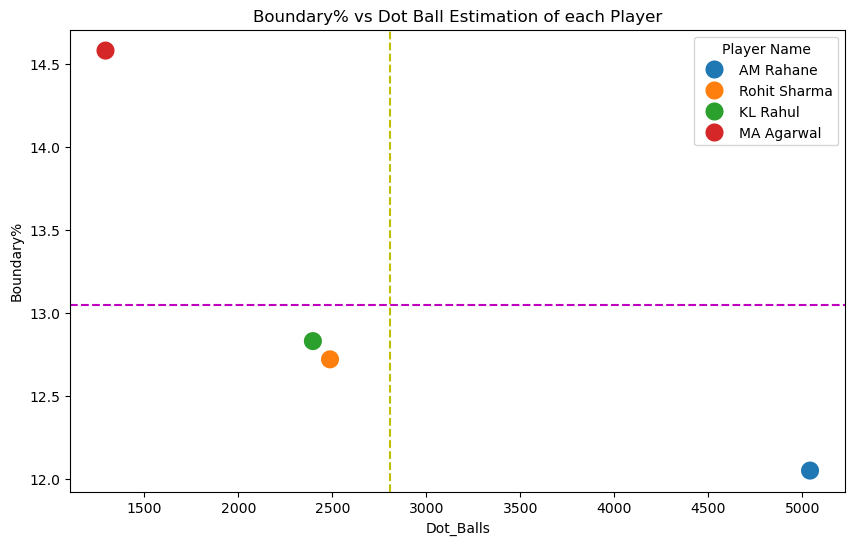

In [46]:
# Boundary% vs Dot Ball Estimate
# Openers must score + rotate strike, not only defend.

df_elite_batters_filtered["Dot_Balls"] = (df_elite_batters_filtered["Balls Faced"] - df_elite_batters_filtered["Runs"])

plt.figure(figsize=(10,6))
sns.scatterplot(data=df_elite_batters_filtered,
                x='Dot_Balls', y='Boundary%', 
                hue='Player Name', s=200)

plt.axvline(df_elite_batters_filtered['Dot_Balls'].mean(), linestyle='--', color='y')
plt.axhline(df_elite_batters_filtered['Boundary%'].mean(), linestyle='--', color='m')

plt.title('Boundary% vs Dot Ball Estimation of each Player')
plt.show()

**Mayank is the only batter to score more boundaries while rotating the strike, while Rohit and Rahul falls below the average lines.**

## <span style="color:yellow; font-weight:bold;">Finalised Oppeners and Substitute:</span>
- **`Rohit Sharma`** – Picked for his `high runs`, `strong average`, and `ability to face more balls`, proving he can build big and stable innings at the top.

- **`Mayank Agarwal`** – Chosen for his `consistent average` and `high 100s conversion rate`, which makes him a reliable scoring partner for Rohit.

- **`KL Rahul`** – Selected as a backup due to his `balanced stats` and `greater experience`, offering stable and dependable support if required.

## <span style="color:yellow; font-weight:bold;">Final Summary of Batters Selection:</span>
- From the overall batting evaluation, **`Virat Kohli`** and **`Cheteshwar Pujara`** stand out as exceptional performers. **`Virat`** combines consistency and impact, making him a reliable match-winner. With his proven leadership qualities, strategic decision-making, and ability to lead by example, **`Virat`** Kohli is selected as the team **`Captain(C)`**

  
- As **`Pujara`** provides remarkable stability and long-innings strength at crucial moments, **`Pujara`** strengthens the core with solid top-order support.


- Based on the combined analysis of batting impact, consistency, and playing style, **`Rohit Sharma and Mayank Agarwal`** are selected as the **`Openers`** in the team. They show a strong balance of boundary scoring, conversion ability, and stability by facing more balls per innings which is crucial for Openers.


- **`Rishabh Pant`** has selected as wicket keeper batsmen for his unique `left-hand batting` advantage and he provides excellent `stability` in `lower middle-order`. He strengthens team balance with a rare combination of attacking `left-hand batting + dynamic wicket-keeping`.
    

-  **`KL Rahul`** is chosen as the `batting substitute` due to his well-rounded performance across all metrics.

## <span style="color:gold; font-weight:bold;">So The Batting line-up so far looks like:</span>
- Rohit Sharma 
- Mayank Agrawal 
- Virat kohli (C)
- CA Pujara
- Rishab Pant (wk)

**`Substitute:`**
- Kl Rahul

# Now Diving into Bowling Selection:

In [47]:
df_bowlers=pd.read_csv('test_bowlers_performance.csv')
df_bowlers.head()

,Player Name,Span,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match
0,R Ashwin,2013-2022,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6
1,RA Jadeja,2013-2022,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1
2,Mohammed Shami,2013-2022,60,114,1804.3,341,5931,216,6/56,9/118,27.45,3.28,50.1,6,0
3,I Sharma,2013-2021,58,107,1648.5,353,4872,174,7/74,9/78,28.00,2.95,56.8,8,0
4,UT Yadav,2014-2022,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1


In [48]:
df_bowlers.dtypes

Player Name              object
Span                     object
Matches                   int64
Innings                  object
Overs                    object
Maidens                  object
Runs                     object
Wickets                  object
Best Bowling(Innings)    object
Best Bowling(Match)      object
Avg                      object
Econ Rate                object
Bowling Strike Rate      object
5w in an Innings         object
10w in a Match           object
dtype: object

In [49]:
# Converting columns datatypes which are supposed to be "int"

cols=['Innings','Maidens','Runs','Wickets','5w in an Innings','10w in a Match']

df_bowlers[cols] = df_bowlers[cols].replace('-', np.nan).fillna(0).astype(int) # Observed a str character '-' in one of the column, so replaced it with null value and then filled it with 0 for smooth conversion.
df_bowlers.dtypes

Player Name              object
Span                     object
Matches                   int64
Innings                   int64
Overs                    object
Maidens                   int64
Runs                      int64
Wickets                   int64
Best Bowling(Innings)    object
Best Bowling(Match)      object
Avg                      object
Econ Rate                object
Bowling Strike Rate      object
5w in an Innings          int64
10w in a Match            int64
dtype: object

In [50]:
# Converting columns datatypes which are supposed to be "float"

cols=['Overs','Avg','Econ Rate','Bowling Strike Rate']

df_bowlers[cols]=df_bowlers[cols].replace('-', np.nan).fillna(0).astype(float) 
df_bowlers.dtypes

Player Name               object
Span                      object
Matches                    int64
Innings                    int64
Overs                    float64
Maidens                    int64
Runs                       int64
Wickets                    int64
Best Bowling(Innings)     object
Best Bowling(Match)       object
Avg                      float64
Econ Rate                float64
Bowling Strike Rate      float64
5w in an Innings           int64
10w in a Match             int64
dtype: object

In [51]:
# Transforming span column to 2 new columns and removing the span column.

df_bowlers[['Start_year','End_year']]=df_bowlers['Span'].str.split('-',expand=True)
df_bowlers.head()

,Player Name,Span,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year
0,R Ashwin,2013-2022,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022
1,RA Jadeja,2013-2022,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022
2,Mohammed Shami,2013-2022,60,114,1804.3,341,5931,216,6/56,9/118,27.45,3.28,50.1,6,0,2013,2022
3,I Sharma,2013-2021,58,107,1648.5,353,4872,174,7/74,9/78,28.00,2.95,56.8,8,0,2013,2021
4,UT Yadav,2014-2022,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022


In [52]:
# Dtypes conversion
df_bowlers['Start_year']=df_bowlers['Start_year'].astype(int)
df_bowlers['End_year']=df_bowlers['End_year'].astype(int)

df_bowlers.drop(columns='Span',inplace=True)
df_bowlers.head()

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022
2,Mohammed Shami,60,114,1804.3,341,5931,216,6/56,9/118,27.45,3.28,50.1,6,0,2013,2022
3,I Sharma,58,107,1648.5,353,4872,174,7/74,9/78,28.00,2.95,56.8,8,0,2013,2021
4,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022


In [53]:
df_bowlers.dtypes

Player Name               object
Matches                    int64
Innings                    int64
Overs                    float64
Maidens                    int64
Runs                       int64
Wickets                    int64
Best Bowling(Innings)     object
Best Bowling(Match)       object
Avg                      float64
Econ Rate                float64
Bowling Strike Rate      float64
5w in an Innings           int64
10w in a Match             int64
Start_year                 int64
End_year                   int64
dtype: object

In [54]:
df_bowlers.isna().sum()

Player Name              0
Matches                  0
Innings                  0
Overs                    0
Maidens                  0
Runs                     0
Wickets                  0
Best Bowling(Innings)    0
Best Bowling(Match)      0
Avg                      0
Econ Rate                0
Bowling Strike Rate      0
5w in an Innings         0
10w in a Match           0
Start_year               0
End_year                 0
dtype: int64

In [55]:
df_bowlers.duplicated().sum()

np.int64(0)

In [56]:
df_bowlers.head()

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022
2,Mohammed Shami,60,114,1804.3,341,5931,216,6/56,9/118,27.45,3.28,50.1,6,0,2013,2022
3,I Sharma,58,107,1648.5,353,4872,174,7/74,9/78,28.00,2.95,56.8,8,0,2013,2021
4,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022


## Our Bowling Requirement:
- Fast/Fast-Medium --> Right-arm
- Fast/Fast-Medium --> Left-arm
- Off-spinner --> Right-arm
- Left-arm Orthodox Spinner (SLA) --> Slow Left-arm Orthodox

## Filtering Elite Bowlers using thresholds

In [57]:
# Calculating extra measures which may be useful for our analysis.

# How many wickets each player have taken per Match on an average.---> In tests, in 1 Match there will be 2 innings played by each team.
df_bowlers['Wkts_per_Match'] = (df_bowlers['Wickets'] / df_bowlers['Matches']).replace([np.inf,-np.inf],np.nan).fillna(0).astype(int)

# How many wickets each player have taken per Innings on an average.
df_bowlers['Wkts_per_Innings'] = (df_bowlers['Wickets'] / df_bowlers['Innings']).replace([np.inf,-np.inf],np.nan).fillna(0).astype(int)

df_bowlers.head()

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022,5,2
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022,4,2
2,Mohammed Shami,60,114,1804.3,341,5931,216,6/56,9/118,27.45,3.28,50.1,6,0,2013,2022,3,1
3,I Sharma,58,107,1648.5,353,4872,174,7/74,9/78,28.00,2.95,56.8,8,0,2013,2021,3,1
4,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1


In [58]:
# Adding a column--> defining the Bowlers Style.
# Source: Chatgpt

bowling_styles = {
    'R Ashwin': ('Right-arm', 'Off-spin'),
    'RA Jadeja': ('Left-arm', 'Orthodox Spin'),
    'Mohammed Shami': ('Right-arm', 'Fast'),
    'I Sharma': ('Right-arm', 'Fast-Medium'),
    'UT Yadav': ('Right-arm', 'Fast'),
    'JJ Bumrah': ('Right-arm', 'Fast'),
    'B Kumar': ('Right-arm', 'Medium-Fast Swing'),
    'AR Patel': ('Left-arm', 'Orthodox Spin'),
    'Mohammed Siraj': ('Right-arm', 'Fast'),
    'Kuldeep Yadav': ('Left-arm', 'Wrist Spin (Chinaman)'),
    'A Mishra': ('Right-arm', 'Leg-spin'),
    'SN Thakur': ('Right-arm', 'Medium-Fast'),
    'PP Ojha': ('Left-arm', 'Orthodox Spin'),
    'HH Pandya': ('Right-arm', 'Medium-Fast'),
    'Z Khan': ('Left-arm', 'Fast-Medium'),
    'J Yadav': ('Right-arm', 'Off-spin'),
    'VR Aaron': ('Right-arm', 'Fast'),
    'Harbhajan Singh': ('Right-arm', 'Off-spin'),
    'S Nadeem': ('Left-arm', 'Orthodox Spin'),
    'Washington Sundar': ('Right-arm', 'Off-spin'),
    'GH Vihari': ('Right-arm', 'Off-break'),
    'NA Saini': ('Right-arm', 'Fast'),
    'KV Sharma': ('Left-arm', 'Wrist Spin'),
    'STR Binny': ('Right-arm', 'Medium'),
    'T Natarajan': ('Left-arm', 'Fast-Medium'),
    'JD Unadkat': ('Left-arm', 'Medium-Fast'),
    'Pankaj Singh': ('Right-arm', 'Medium-Fast'),
    'RG Sharma': ('Right-arm', None),
    'SR Tendulkar': ('Right-arm', 'Part-time Spin'),
    'M Vijay': ('Right-arm', 'Part-time Off-break'),
    'S Dhawan': ('Right-arm', 'Part-time Off-break'),
    'MS Dhoni': ('Right-arm', None),
    'V Kohli': ('Right-arm', 'Medium'),
    'KK Nair': ('Right-arm', 'Off-break'),
    'CA Pujara': ('Right-arm', 'Leg-break'),
    'SK Raina': ('Right-arm', 'Off-spin'),
    'MA Agarwal': ('Right-arm', None),
    'G Gambhir': ('Right-arm', None),
    'SS Iyer': ('Right-arm', 'Leg-break'),
    'KD Karthik': ('Right-arm', None),
    'A Mukund': ('Right-arm', None),
    'NV Ojha': ('Right-arm', None),
    'RR Pant': ('Right-arm', None),
    'PA Patel': ('Right-arm', None),
    'AM Rahane': ('Right-arm', 'Medium'),
    'KL Rahul': ('Right-arm', None),
    'WP Saha': ('Right-arm', None),
    'V Sehwag': ('Right-arm', 'Off-spin'),
    'PP Shaw': ('Right-arm', None),
    'Shubman Gill': ('Right-arm', None)
}

df_bowlers['Bowling Style'] = df_bowlers['Player Name'].map(lambda x: bowling_styles[x][1])
df_bowlers['Bowling Arm'] = df_bowlers['Player Name'].map(lambda x: bowling_styles[x][0])

df_bowlers.head()


,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022,5,2,Off-spin,Right-arm
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022,4,2,Orthodox Spin,Left-arm
2,Mohammed Shami,60,114,1804.3,341,5931,216,6/56,9/118,27.45,3.28,50.1,6,0,2013,2022,3,1,Fast,Right-arm
3,I Sharma,58,107,1648.5,353,4872,174,7/74,9/78,28.00,2.95,56.8,8,0,2013,2021,3,1,Fast-Medium,Right-arm
4,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm


### Filtering Senior Bowlers

In [59]:
senior_bowlers=df_bowlers[(df_bowlers['Start_year']==2013) & ((df_bowlers['End_year']==2022))].reset_index(drop=True)
senior_bowlers

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022,5,2,Off-spin,Right-arm
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022,4,2,Orthodox Spin,Left-arm
2,Mohammed Shami,60,114,1804.3,341,5931,216,6/56,9/118,27.45,3.28,50.1,6,0,2013,2022,3,1,Fast,Right-arm
3,RG Sharma,45,16,63.5,5,224,2,1/26,1/35,112.00,3.50,191.5,0,0,2013,2022,0,0,None,Right-arm
4,V Kohli,90,8,18.1,2,49,0,-,-,0.00,2.69,0.0,0,0,2013,2022,0,0,Medium,Right-arm
5,CA Pujara,89,1,1.0,0,2,0,-,-,0.00,2.00,0.0,0,0,2013,2022,0,0,Leg-break,Right-arm
6,AM Rahane,82,0,0.0,0,0,0,-,-,0.00,0.00,0.0,0,0,2013,2022,0,0,Medium,Right-arm


In [60]:
# Filtering Senior Elite Players Based on Few Thresholds.

senior_elite_bowlers = senior_bowlers[
    
    (senior_bowlers['Matches'] >= 20) &
    (senior_bowlers['Avg'] <= 30) &
    (senior_bowlers['Bowling Strike Rate'] <= 60) &
    (senior_bowlers['Econ Rate'] <= 3.20) &
    (senior_bowlers['Wkts_per_Match'] >= 3) &
   (senior_bowlers['5w in an Innings'] >= 3) &
    (senior_bowlers['Start_year']== 2013) &
    (senior_bowlers['End_year'] >= 2022) 
    
].reset_index(drop=True)

senior_elite_bowlers

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022,5,2,Off-spin,Right-arm
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022,4,2,Orthodox Spin,Left-arm


### Filtering Junior Bowlers

In [61]:
junior_bowlers=df_bowlers[(df_bowlers['Start_year']>=2014) & ((df_bowlers['End_year']==2022))].reset_index(drop=True)

junior_bowlers

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm
1,JJ Bumrah,30,58,1044.4,254,2815,128,6/27,9/86,21.99,2.69,48.9,8,0,2018,2022,4,2,Fast,Right-arm
2,AR Patel,8,16,290.2,70,672,47,6/38,11/70,14.29,2.31,37.0,5,1,2021,2022,5,2,Orthodox Spin,Left-arm
3,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm
4,Kuldeep Yadav,8,14,213.1,33,733,34,5/40,8/113,21.55,3.43,37.6,3,0,2017,2022,4,2,Wrist Spin (Chinaman),Left-arm
5,SN Thakur,8,15,184.3,26,660,27,7/61,8/108,24.44,3.57,41.0,1,0,2018,2022,3,1,Medium-Fast,Right-arm
6,J Yadav,6,12,137.3,28,465,16,4/49,5/62,29.06,3.38,51.5,0,0,2016,2022,2,1,Off-spin,Right-arm
7,GH Vihari,16,10,57.3,10,180,5,3/37,3/38,36.00,3.13,69.0,0,0,2018,2022,0,0,Off-break,Right-arm
8,JD Unadkat,1,2,25.0,5,67,3,2/50,3/67,22.33,2.68,50.0,0,0,2022,2022,3,1,Medium-Fast,Left-arm
9,MA Agarwal,21,0,0.0,0,0,0,-,-,0.00,0.00,0.0,0,0,2018,2022,0,0,None,Right-arm


In [62]:
# Setting Thresholds for junior bowler to filter elite bowlers.

junior_elite_bowlers = junior_bowlers[
    
    (junior_bowlers['Start_year'] >= 2014) &
    (junior_bowlers['Matches'] >= 8) &
    (junior_bowlers['Avg'] <= 32) &
    (junior_bowlers['Econ Rate'] <= 3.45) &
    (junior_bowlers['Bowling Strike Rate'] <= 60) &
    (junior_bowlers['Wkts_per_Match'] >= 2) 
]

junior_elite_bowlers

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm
1,JJ Bumrah,30,58,1044.4,254,2815,128,6/27,9/86,21.99,2.69,48.9,8,0,2018,2022,4,2,Fast,Right-arm
2,AR Patel,8,16,290.2,70,672,47,6/38,11/70,14.29,2.31,37.0,5,1,2021,2022,5,2,Orthodox Spin,Left-arm
3,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm
4,Kuldeep Yadav,8,14,213.1,33,733,34,5/40,8/113,21.55,3.43,37.6,3,0,2017,2022,4,2,Wrist Spin (Chinaman),Left-arm


### Combining Senior and Junior Elite Bowlers

In [63]:
elite_bowlers=pd.concat([senior_elite_bowlers,junior_elite_bowlers],ignore_index=True)
elite_bowlers

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022,5,2,Off-spin,Right-arm
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022,4,2,Orthodox Spin,Left-arm
2,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm
3,JJ Bumrah,30,58,1044.4,254,2815,128,6/27,9/86,21.99,2.69,48.9,8,0,2018,2022,4,2,Fast,Right-arm
4,AR Patel,8,16,290.2,70,672,47,6/38,11/70,14.29,2.31,37.0,5,1,2021,2022,5,2,Orthodox Spin,Left-arm
5,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm
6,Kuldeep Yadav,8,14,213.1,33,733,34,5/40,8/113,21.55,3.43,37.6,3,0,2017,2022,4,2,Wrist Spin (Chinaman),Left-arm


In [64]:
# Checking for our fast bowling requirments.

df_bowlers[((df_bowlers['Bowling Style']=='Fast') | (df_bowlers['Bowling Style']=='Fast-Medium')) & (df_bowlers['End_year']==2022)]

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
2,Mohammed Shami,60,114,1804.3,341,5931,216,6/56,9/118,27.45,3.28,50.1,6,0,2013,2022,3,1,Fast,Right-arm
4,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm
5,JJ Bumrah,30,58,1044.4,254,2815,128,6/27,9/86,21.99,2.69,48.9,8,0,2018,2022,4,2,Fast,Right-arm
8,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm


**As we can see there are no `Fast/Fast-Medium and Left-arm` active players in the dataset, we would Proceed with two Right-arm Fast Bowlers**

## Now Our Updated Aim for Bowling Order:
- Fast/Fast-Medium --> Right-arm
- Fast/Fast-Medium --> Right-arm
- Off-spinner --> Right-arm
- Left-arm Orthodox Spinner (SLA) --> Slow Left-arm Orthodox

In [65]:
elite_bowlers

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022,5,2,Off-spin,Right-arm
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022,4,2,Orthodox Spin,Left-arm
2,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm
3,JJ Bumrah,30,58,1044.4,254,2815,128,6/27,9/86,21.99,2.69,48.9,8,0,2018,2022,4,2,Fast,Right-arm
4,AR Patel,8,16,290.2,70,672,47,6/38,11/70,14.29,2.31,37.0,5,1,2021,2022,5,2,Orthodox Spin,Left-arm
5,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm
6,Kuldeep Yadav,8,14,213.1,33,733,34,5/40,8/113,21.55,3.43,37.6,3,0,2017,2022,4,2,Wrist Spin (Chinaman),Left-arm


### We are going to split the bowlers based on their `Bowling Style` as the performance indicators have different expectations for pacers & spinners in Tests.

In [66]:
# elite spinners

elite_spinners=elite_bowlers[elite_bowlers['Bowling Style'].isin(['Off-spin','Orthodox Spin','Wrist Spin (Chinaman)'])]

elite_spinners

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022,5,2,Off-spin,Right-arm
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022,4,2,Orthodox Spin,Left-arm
4,AR Patel,8,16,290.2,70,672,47,6/38,11/70,14.29,2.31,37.0,5,1,2021,2022,5,2,Orthodox Spin,Left-arm
6,Kuldeep Yadav,8,14,213.1,33,733,34,5/40,8/113,21.55,3.43,37.6,3,0,2017,2022,4,2,Wrist Spin (Chinaman),Left-arm


In [67]:
# elite pacers

elite_pacers=elite_bowlers[elite_bowlers['Bowling Style']=='Fast']

elite_pacers

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
2,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm
3,JJ Bumrah,30,58,1044.4,254,2815,128,6/27,9/86,21.99,2.69,48.9,8,0,2018,2022,4,2,Fast,Right-arm
5,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm


## Analyzing Spinners Stats using Plots.

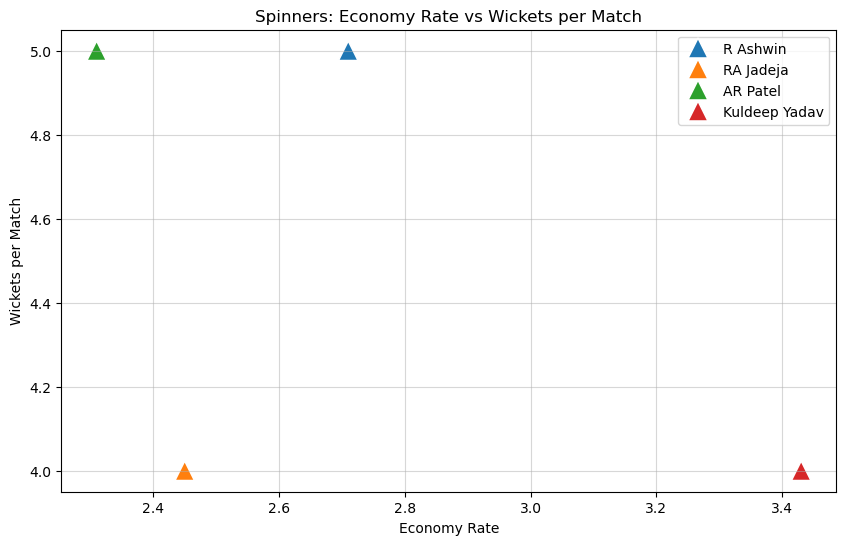

In [68]:
# Economy Rate vs Wickets per Match --> control + wicket-taking ability   

plt.figure(figsize=(10,6))
sns.scatterplot(data=elite_spinners,x='Econ Rate', y='Wkts_per_Match', hue='Player Name',marker='^',s=200)
plt.legend(loc=0)
plt.grid(alpha=0.5)


plt.ylabel('Wickets per Match')
plt.xlabel('Economy Rate')
plt.title('Spinners: Economy Rate vs Wickets per Match')
plt.show()

**Ashwin, Jadeja, and Axar Patel holds strong Control + Wicket taking Ability**

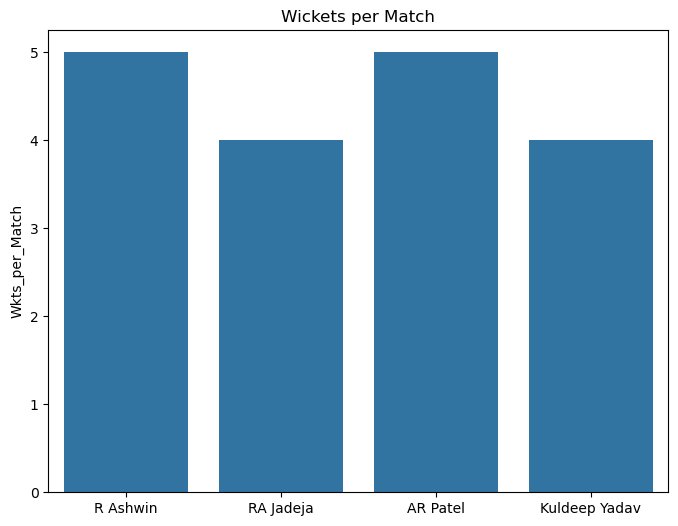

In [69]:
# Wickets per Match

plt.figure(figsize=(8,6))
sns.barplot(data=elite_spinners, x='Player Name', y='Wkts_per_Match')

plt.title('Wickets per Match')
plt.xlabel('')
plt.show()

**Ashwin and Axar have consistency & reliability in taking wickets**

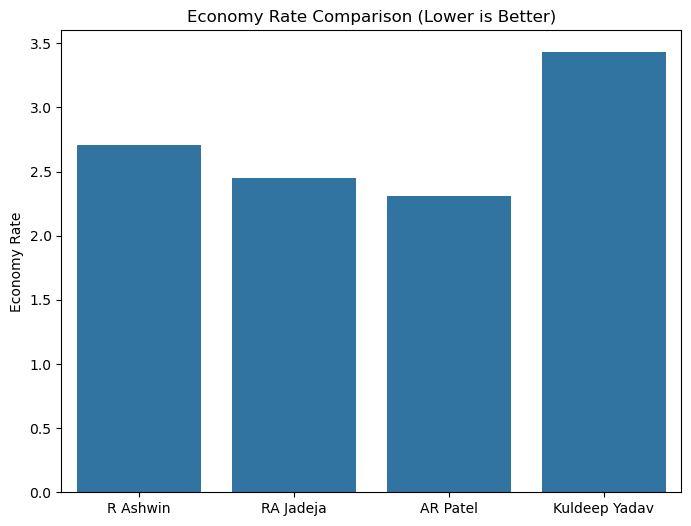

In [70]:
# Economy Rate

plt.figure(figsize=(8,6))
sns.barplot(data=elite_spinners, x='Player Name', y='Econ Rate')

plt.title('Economy Rate Comparison (Lower is Better)')
plt.ylabel('Economy Rate')
plt.xlabel('')
plt.show()

**Ashwin, Jadeja and Axar have lower Economy Rate which shows their consistency & reliability in taking wickets**

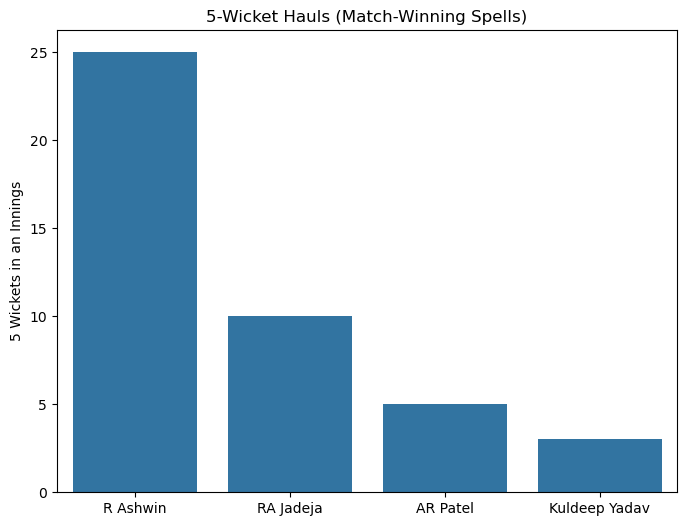

In [71]:
# Number of 5W Innings

plt.figure(figsize=(8,6))
sns.barplot(data=elite_spinners, x='Player Name', y='5w in an Innings')

plt.title('5-Wicket Hauls (Match-Winning Spells)')
plt.ylabel('5 Wickets in an Innings')
plt.xlabel('')
plt.show()


**Ashwin Stands Tall with around 25 matches with 5W in an Innings, followed by jadeja with around 10 Matches**

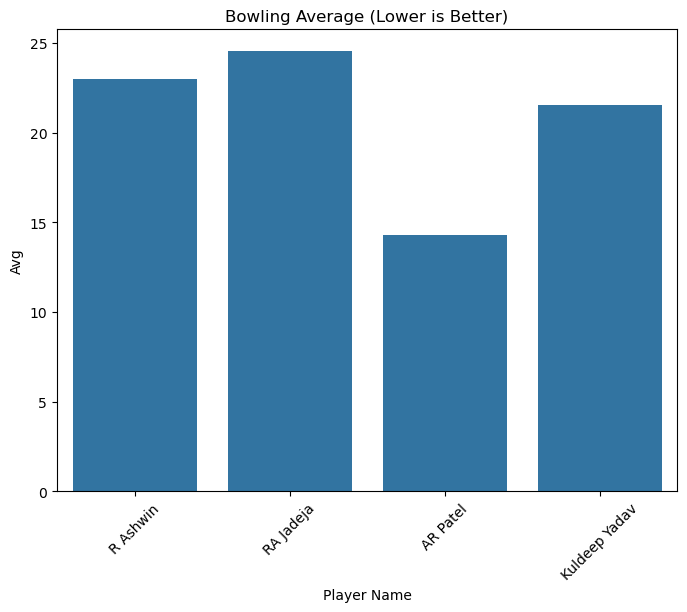

In [72]:
# Bowling Average

plt.figure(figsize=(8,6))
sns.barplot(data=elite_spinners, x='Player Name', y='Avg')

plt.title('Bowling Average (Lower is Better)')
plt.xticks(rotation=45)
plt.show()

**Axar and Ashwin have better long-term wicket efficiency**

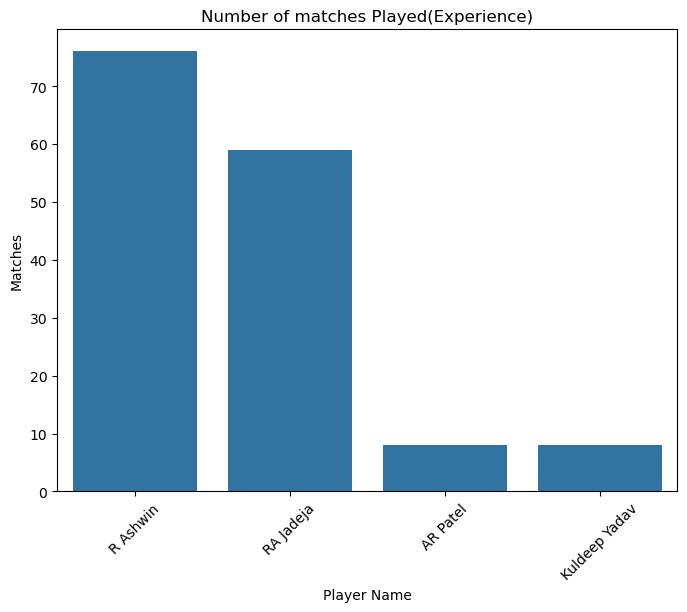

In [73]:
# Number of Matches Played.

plt.figure(figsize=(8,6))
sns.barplot(data=elite_spinners, x='Player Name', y='Matches')

plt.title('Number of matches Played(Experience)')
plt.xticks(rotation=45)
plt.show()

**Both Ashwin and Jadeja have contributed in a lot of matches compared to Axar and Kuldeep which shows that they are experienced in playing across different Surfaces throughout the world**

## <span style="color:#4CAF50; font-weight:bold;">Final Selection summary of spinners:</span>
- Based on Test bowling metrics, `Ravichandran Ashwin` and `Ravindra Jadeja` were selected as the `frontline spinners`.
  
-  Ashwin offers `match-winning experience` and `control` against left-handers, while Jadeja provides the `most economical spells` and `variation` as a `left-arm orthodox bowler`.

  
-   `Axar Patel` was chosen as the `substitute spinner` due to his superior average, low economy, and high wickets per match, although he has played `very few matches` currently, which prevents him from being an automatic starter.

## <span style="color:#4CAF50; font-weight:bold;">Frontline Spinners:</span>
- R Ashwin --> Right-arm Off-spin bowler
- RA Jadeja --> Left-arm Orthodox bowler

**`Substitute:`**
- AR Patel --> Left-arm Orthodox bowler

## Now Analyzing Pacers Stats using Plots.

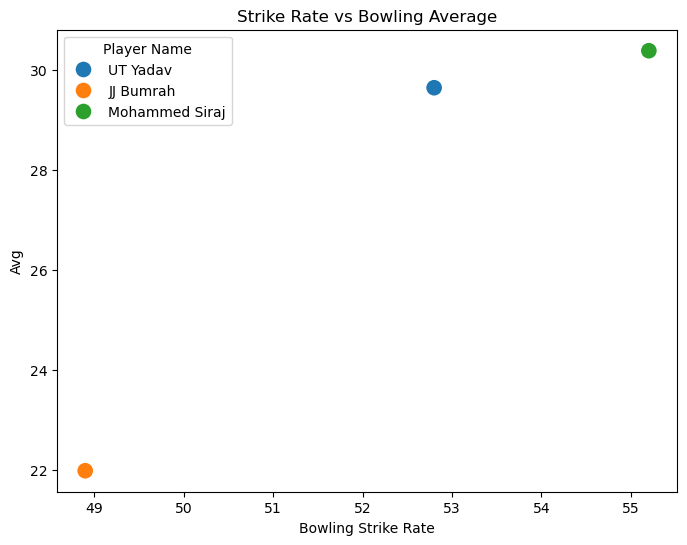

In [74]:
# Strike Rate vs Average --> Low Strike Rate + Low Avg = Top Fast Bowler

plt.figure(figsize=(8,6))
sns.scatterplot(data=elite_pacers, x='Bowling Strike Rate', y='Avg', hue='Player Name', s=150)

plt.title('Strike Rate vs Bowling Average')
plt.show()


**Only Bumrah is Exceptional with low Bowling Strike Rate and avg**

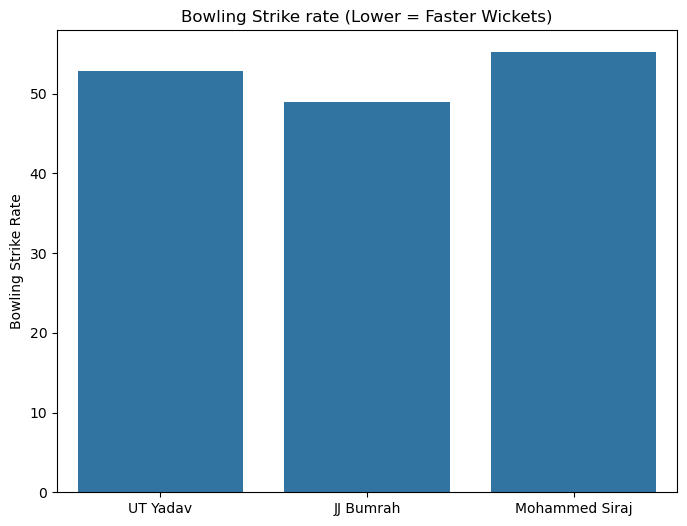

In [75]:
# Bowling Strike Rate

plt.figure(figsize=(8,6))
sns.barplot(data=elite_pacers,x='Player Name',y='Bowling Strike Rate')

plt.title('Bowling Strike rate (Lower = Faster Wickets)')
plt.xlabel('')
plt.show()

**Bumrah and Umesh Yadav have lower Bowling Strike Rate compared to Siraj which shows that they have good wickets taking probability with fewer deliveries.**

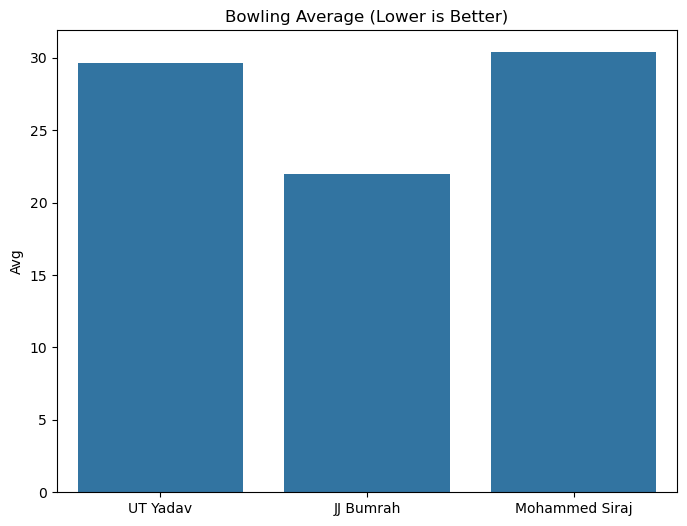

In [76]:
# Bowling Average

plt.figure(figsize=(8,6))
sns.barplot(data=elite_pacers,x='Player Name',y='Avg')

plt.title('Bowling Average (Lower is Better)')
plt.xlabel('')
plt.show()

**Bumrah and Umesh Yadav have Better averages than siraj which shows the efficiency of wicket-taking without leaking runs.**

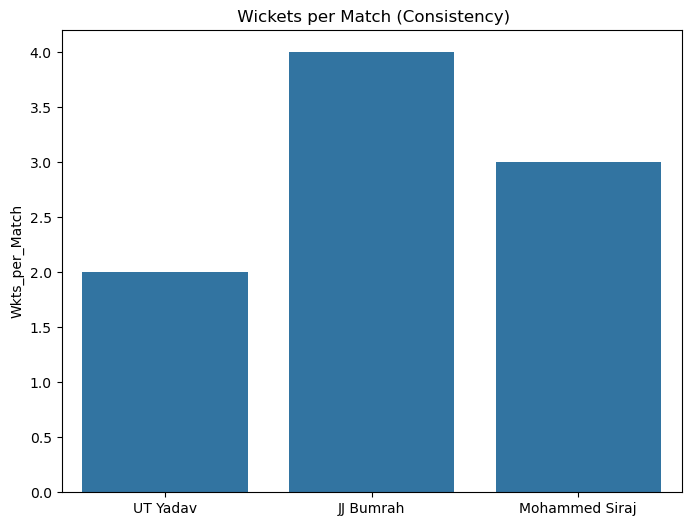

In [77]:
# Wickets per Match

plt.figure(figsize=(8,6))
sns.barplot(data=elite_pacers, x='Player Name', y='Wkts_per_Match')

plt.title(' Wickets per Match (Consistency)')
plt.xlabel('')
plt.show()

**Bumrah and Siraj have Better stats in taking Good amount of wickets per match**

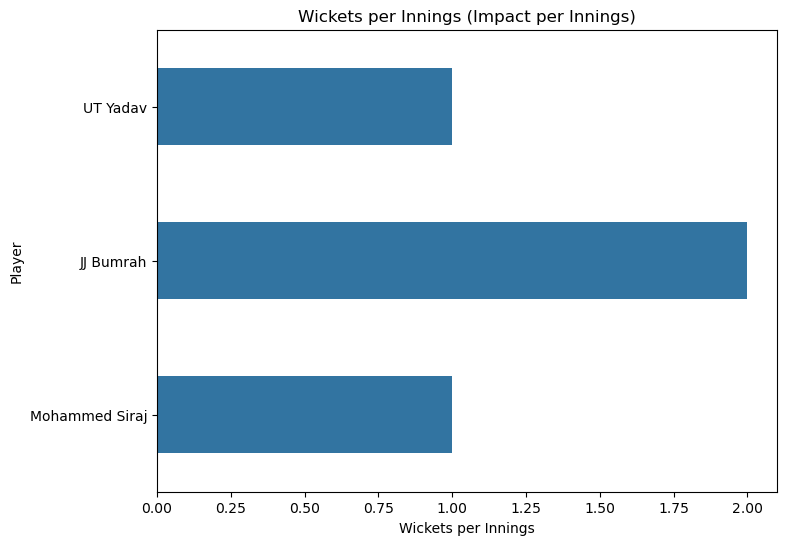

In [78]:
# Wickets per Innings

plt.figure(figsize=(8,6))
sns.barplot(data=elite_pacers, x='Wkts_per_Innings', y='Player Name',width=0.5)

plt.xlabel('Wickets per Innings')
plt.ylabel('Player')
plt.title('Wickets per Innings (Impact per Innings)')
plt.show()


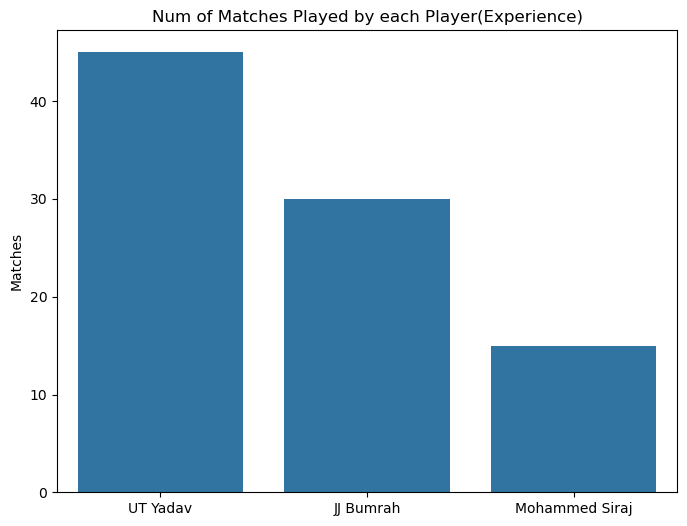

In [79]:
# Matches Played

plt.figure(figsize=(8,6))
sns.barplot(data=elite_pacers,x='Player Name',y='Matches')

plt.title('Num of Matches Played by each Player(Experience)')
plt.xlabel('')
plt.show()

**Umesh Yadav and Bumrah have Played most matches compared to siraj, hence they are most experienced and played at different surfaces across the globe**

## <span style="color:teal; font-weight:bold;">Final Pacers Selection Summary:</span>
- `Jasprit Bumrah` and `Mohammed Siraj` were selected as the frontline pacers based on superior strike rate, bowling average, and wickets per match. --> **`Strike bowler + match-winner in any condition.`**

  
- Bumrah leads as the `primary strike bowler`, while Siraj provides consistent `wicket-taking support`. --> **`Better consistency + wicket bursts than Umesh.`**


- `Umesh Yadav` was chosen as the `substitute` due to his experience and ability to produce impactful spells, despite slightly lower `consistency`. --> **`Can use him in: India home pitches, 2nd innings reverse swing.`**

## <span style="color:teal; font-weight:bold;">Frontline Pacers:</span>
- Jasprit Bumrah --> Right-arm Fast Bowler
- Mohammed Siraj --> Right-arm Fast Bowler

**`Substitute:`**
- Umesh Yadav --> Right-arm Fast Bowler


## `Frontline Bowlers:`
- R Ashwin --> Right-arm Off-spin bowler
- RA Jadeja --> Left-arm Orthodox bowler
- Jasprit Bumrah --> Right-arm Fast Bowler
- Mohammed Siraj --> Right-arm Fast Bowler

### `Substitutes:`
- AR Patel --> Left-arm Orthodox bowler
- Umesh Yadav --> Right-arm Fast Bowler

# Lastly the All-rounders Selection:

In [80]:
df_allrounders=pd.read_csv('test_allrounders_performance.csv')
df_allrounders.head()

,Player Name,Span,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff
0,V Kohli,2013-2022,90,7228,254*,50.54,24,0,-,-,0,86,0,-
1,CA Pujara,2013-2022,89,6253,204,43.12,16,0,-,-,0,56,0,-
2,AM Rahane,2013-2022,82,4931,188,38.52,12,-,-,-,-,99,0,-
3,R Ashwin,2013-2022,76,2447,124,24.96,4,386,7/59,22.97,25,29,0,1.99
4,Mohammed Shami,2013-2022,60,685,56*,11.61,0,216,6/56,27.45,6,16,0,-15.84


In [81]:
df_allrounders.dtypes

Player Name              object
Span                     object
Matches                   int64
Runs                      int64
Highest Score            object
Batting Avg              object
100                       int64
Wkts                     object
Best Bowling(Innings)    object
Bowling Avg              object
5w in an Innings         object
Catches Taken             int64
Stumpings Made            int64
Avg Diff                 object
dtype: object

### DataTypes Conversion:

In [82]:
df_allrounders['Highest Score']=df_allrounders['Highest Score'].str.replace('*','').replace('-','0',regex=False).astype(int)
df_allrounders['Batting Avg']=df_allrounders['Batting Avg'].str.replace('-','0',regex=False).fillna(0).astype(float)

df_allrounders.dtypes

Player Name               object
Span                      object
Matches                    int64
Runs                       int64
Highest Score              int64
Batting Avg              float64
100                        int64
Wkts                      object
Best Bowling(Innings)     object
Bowling Avg               object
5w in an Innings          object
Catches Taken              int64
Stumpings Made             int64
Avg Diff                  object
dtype: object

In [83]:
df_allrounders['Wkts']=df_allrounders['Wkts'].str.replace('-','0',regex=False).astype(int)
df_allrounders['5w in an Innings']=df_allrounders['5w in an Innings'].str.replace('-','0',regex=False).astype(int)

df_allrounders.dtypes

Player Name               object
Span                      object
Matches                    int64
Runs                       int64
Highest Score              int64
Batting Avg              float64
100                        int64
Wkts                       int64
Best Bowling(Innings)     object
Bowling Avg               object
5w in an Innings           int64
Catches Taken              int64
Stumpings Made             int64
Avg Diff                  object
dtype: object

In [84]:
df_allrounders['Bowling Avg']=df_allrounders['Bowling Avg'].str.replace('-','0').astype(float)
df_allrounders['Avg Diff']=df_allrounders['Avg Diff'].str.replace('-','0').astype(float)

df_allrounders.dtypes

Player Name               object
Span                      object
Matches                    int64
Runs                       int64
Highest Score              int64
Batting Avg              float64
100                        int64
Wkts                       int64
Best Bowling(Innings)     object
Bowling Avg              float64
5w in an Innings           int64
Catches Taken              int64
Stumpings Made             int64
Avg Diff                 float64
dtype: object

In [85]:
df_allrounders.head()

,Player Name,Span,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff
0,V Kohli,2013-2022,90,7228,254,50.54,24,0,-,0.00,0,86,0,0.00
1,CA Pujara,2013-2022,89,6253,204,43.12,16,0,-,0.00,0,56,0,0.00
2,AM Rahane,2013-2022,82,4931,188,38.52,12,0,-,0.00,0,99,0,0.00
3,R Ashwin,2013-2022,76,2447,124,24.96,4,386,7/59,22.97,25,29,0,1.99
4,Mohammed Shami,2013-2022,60,685,56,11.61,0,216,6/56,27.45,6,16,0,15.84


In [86]:
# Converting span column into 2 New columns namely "Start_year" and "End_year".

df_allrounders[['Start_year','End_year']]=df_allrounders['Span'].str.split('-',expand=True).astype(int)

df_allrounders.head()

,Player Name,Span,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year
0,V Kohli,2013-2022,90,7228,254,50.54,24,0,-,0.00,0,86,0,0.00,2013,2022
1,CA Pujara,2013-2022,89,6253,204,43.12,16,0,-,0.00,0,56,0,0.00,2013,2022
2,AM Rahane,2013-2022,82,4931,188,38.52,12,0,-,0.00,0,99,0,0.00,2013,2022
3,R Ashwin,2013-2022,76,2447,124,24.96,4,386,7/59,22.97,25,29,0,1.99,2013,2022
4,Mohammed Shami,2013-2022,60,685,56,11.61,0,216,6/56,27.45,6,16,0,15.84,2013,2022


In [87]:
# Dropping span column
df_allrounders=df_allrounders.drop(columns='Span')
df_allrounders.head()

,Player Name,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year
0,V Kohli,90,7228,254,50.54,24,0,-,0.00,0,86,0,0.00,2013,2022
1,CA Pujara,89,6253,204,43.12,16,0,-,0.00,0,56,0,0.00,2013,2022
2,AM Rahane,82,4931,188,38.52,12,0,-,0.00,0,99,0,0.00,2013,2022
3,R Ashwin,76,2447,124,24.96,4,386,7/59,22.97,25,29,0,1.99,2013,2022
4,Mohammed Shami,60,685,56,11.61,0,216,6/56,27.45,6,16,0,15.84,2013,2022


In [88]:
df_allrounders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Player Name            50 non-null     object 
 1   Matches                50 non-null     int64  
 2   Runs                   50 non-null     int64  
 3   Highest Score          50 non-null     int64  
 4   Batting Avg            50 non-null     float64
 5   100                    50 non-null     int64  
 6   Wkts                   50 non-null     int64  
 7   Best Bowling(Innings)  50 non-null     object 
 8   Bowling Avg            50 non-null     float64
 9   5w in an Innings       50 non-null     int64  
 10  Catches Taken          50 non-null     int64  
 11  Stumpings Made         50 non-null     int64  
 12  Avg Diff               50 non-null     float64
 13  Start_year             50 non-null     int64  
 14  End_year               50 non-null     int64  
dtypes: float

In [89]:
df_allrounders.duplicated().sum()

np.int64(0)

### Adding extra measured columns for better analysis.

In [90]:
## These are the average metrics added to the dataset.

# Bat_Runs_per_Match --> Measures how consistent the player is in scoring runs every match
df_allrounders['Bat_Runs_per_Match'] =(df_allrounders['Runs'] / df_allrounders['Matches']).astype(int)

# Wkts_per_Match --> Consistent wicket-taking ability across Test matches
df_allrounders['Wkts_per_Match'] = (df_allrounders['Wkts'] / df_allrounders['Matches']).astype(int)

# Catches_per_Match --> Measures how active & valuable a player is in fielding (extra contribution to team)
df_allrounders['Catches_per_Match'] = (df_allrounders['Catches Taken'] / df_allrounders['Matches']).astype(int)

df_allrounders.head()

,Player Name,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year,Bat_Runs_per_Match,Wkts_per_Match,Catches_per_Match
0,V Kohli,90,7228,254,50.54,24,0,-,0.00,0,86,0,0.00,2013,2022,80,0,0
1,CA Pujara,89,6253,204,43.12,16,0,-,0.00,0,56,0,0.00,2013,2022,70,0,0
2,AM Rahane,82,4931,188,38.52,12,0,-,0.00,0,99,0,0.00,2013,2022,60,0,1
3,R Ashwin,76,2447,124,24.96,4,386,7/59,22.97,25,29,0,1.99,2013,2022,32,5,0
4,Mohammed Shami,60,685,56,11.61,0,216,6/56,27.45,6,16,0,15.84,2013,2022,11,3,0


### Type of All-Rounders we are looking for:
- `Primary All-Rounder (Batting All-Rounder)` --> Must contribute reliable middle-order batting
  
- `Secondary All-Rounder (Bowling All-Rounder)` --> Must provide long spells + breakthroughs

## Filtering Senior and Junior Elite All-Rounders

In [91]:
senior_allrounders=df_allrounders[(df_allrounders['Start_year']==2013) & (df_allrounders['End_year']==2022)].reset_index(drop=True)
senior_allrounders

,Player Name,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year,Bat_Runs_per_Match,Wkts_per_Match,Catches_per_Match
0,V Kohli,90,7228,254,50.54,24,0,-,0.00,0,86,0,0.00,2013,2022,80,0,0
1,CA Pujara,89,6253,204,43.12,16,0,-,0.00,0,56,0,0.00,2013,2022,70,0,0
2,AM Rahane,82,4931,188,38.52,12,0,-,0.00,0,99,0,0.00,2013,2022,60,0,1
3,R Ashwin,76,2447,124,24.96,4,386,7/59,22.97,25,29,0,1.99,2013,2022,32,5,0
4,Mohammed Shami,60,685,56,11.61,0,216,6/56,27.45,6,16,0,15.84,2013,2022,11,3,0
5,RA Jadeja,59,2511,175,36.92,3,239,7/48,24.53,10,39,0,12.39,2013,2022,42,4,0
6,RG Sharma,45,3137,212,46.13,8,2,1/26,112.00,0,49,0,65.86,2013,2022,69,0,1


**We can see there are no much prominent allrounders other than already selected players in this senior allrounders data, hence we rely on junior allrounders to fill up the allrounders place.**

In [92]:
junior_allrounders=df_allrounders[df_allrounders['Start_year']>=2014].reset_index(drop=True)
junior_allrounders.head()

,Player Name,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year,Bat_Runs_per_Match,Wkts_per_Match,Catches_per_Match
0,KL Rahul,45,2604,199,34.26,7,0,-,0.00,0,52,0,0.00,2014,2022,57,0,1
1,UT Yadav,45,401,31,13.36,0,133,6/88,29.65,2,17,0,16.28,2014,2022,8,2,0
2,WP Saha,38,1279,117,30.45,3,0,-,0.00,0,90,12,0.00,2014,2021,33,0,2
3,RR Pant,33,2271,159,43.67,5,0,-,0.00,0,119,14,0.00,2018,2022,68,0,3
4,JJ Bumrah,30,212,34,7.31,0,128,6/27,21.99,8,8,0,14.68,2018,2022,7,4,0


In [93]:
# Setting Threshold for junior allrounders

junior_allrounders[
   (junior_allrounders['Batting Avg'] >= 32) &
   (junior_allrounders['Bat_Runs_per_Match'] >= 25) &
   (junior_allrounders['Highest Score'] >= 90)&
   (junior_allrounders['Bowling Avg'] <= 33) &
   (junior_allrounders['Wkts_per_Match'] >= 1.5) 
]


,Player Name,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year,Bat_Runs_per_Match,Wkts_per_Match,Catches_per_Match


**No allrounder passed the best allrounder metrics Threshold**

In [94]:
# Abovve threshold failed to get best players hence we reduce the thresholds for better players.

junior_allrounders[
    (junior_allrounders['Batting Avg'] >= 28) &           
    (junior_allrounders['Bat_Runs_per_Match'] >= 30) &       
    (junior_allrounders['Wkts_per_Match'] >= 1.0) &          
    (junior_allrounders['Bowling Avg'] <= 40) &             
    (junior_allrounders['Wkts'] >= 5) &                     
    (junior_allrounders['Batting Avg'] >= 18)
]

,Player Name,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year,Bat_Runs_per_Match,Wkts_per_Match,Catches_per_Match
9,HH Pandya,11,532,108,31.29,1,17,5/28,31.05,1,7,0,0.23,2017,2018,48,1,0
18,J Yadav,6,248,104,31.00,1,16,4/49,29.06,0,3,0,1.93,2016,2022,41,2,0


**Only 2 Players Passed the Average level threshold metrics.**

In [95]:
# Both the above thresholds failed to get the decent allrounders, hence we check with minimum qualifications for an allrounder.

junior_allrounders[
   ( (junior_allrounders['Batting Avg'] >= 25) | (junior_allrounders['Bowling Avg'] <= 33) ) &
    (junior_allrounders['Wkts'] >= 3) &                      
    (junior_allrounders['Batting Avg'] >= 15) &              
    (junior_allrounders['Bat_Runs_per_Match'] >= 15) &       
    (junior_allrounders['Wkts_per_Match'] >= 1)   
]

,Player Name,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year,Bat_Runs_per_Match,Wkts_per_Match,Catches_per_Match
9,HH Pandya,11,532,108,31.29,1,17,5/28,31.05,1,7,0,0.23,2017,2018,48,1,0
10,A Mishra,9,256,59,19.69,0,33,4/43,25.84,0,2,0,6.15,2015,2016,28,3,0
13,AR Patel,8,249,52,22.63,0,47,6/38,14.29,5,2,0,8.33,2021,2022,31,5,0
14,SN Thakur,8,254,67,19.53,0,27,7/61,24.44,1,2,0,4.90,2018,2022,31,3,0
18,J Yadav,6,248,104,31.00,1,16,4/49,29.06,0,3,0,1.93,2016,2022,41,2,0
22,Washington Sundar,4,265,96,66.25,0,6,3/89,49.83,0,1,0,16.41,2021,2021,66,1,0
32,JD Unadkat,1,27,14,27.00,0,3,2/50,22.33,0,1,0,4.66,2022,2022,27,3,1


**The players who passed the minimum Threshold metrics have only played few matches(unproven performances) which makes us difficult to rely on them as well.**

## `Since no junior player met the required all-rounder standards, Jadeja and Ashwin who were selected in the bowling unit will be retained as spin all-rounders. The balance of the squad was strengthened by adding one "Specialist Batter" and one "Specialist Bowler" instead of forcing unreliable junior all-rounders into the team.`

In [96]:
# Now we have to select one player among "Rahane and Rahul" as main player and one as the substitute.

df_elite_batters 

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings
0,V Kohli,90,152,9,7228,254,50.54,12681,56.99,24,23,12,809,20,RHB,2013,2022,83
1,CA Pujara,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14,RHB,2013,2022,92
2,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022,71
3,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022,73
4,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022,64
5,Rishab Pant,33,56,4,2271,159,43.67,3084,73.63,5,11,2,246,55,LHB,2018,2022,55
6,MA Agarwal,21,36,0,1488,243,41.33,2782,53.48,4,6,1,189,28,RHB,2018,2022,77


In [97]:
specialist_batter=df_elite_batters[df_elite_batters['Player Name'].isin(['AM Rahane','KL Rahul'])]
specialist_batter

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings
2,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022,71
4,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022,64


<Axes: xlabel='Matches', ylabel='Avg'>

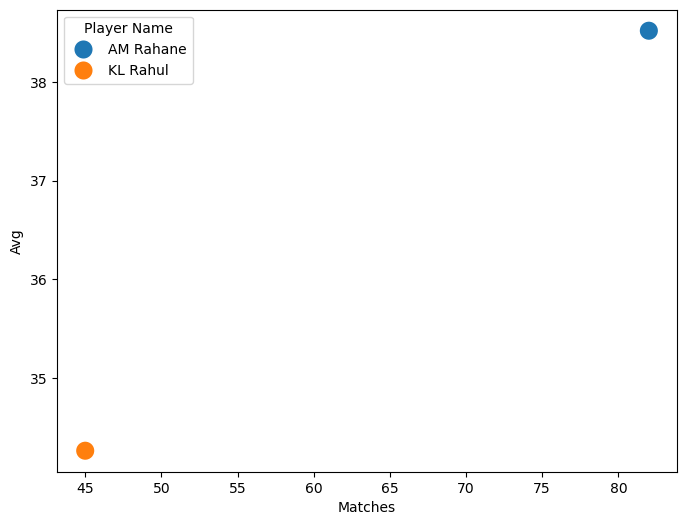

In [98]:
# Batting Avg vs Matches --> High Avg + Many Matches = most trustworthy

plt.figure(figsize=(8,6))
sns.scatterplot(data=specialist_batter, x='Matches', y='Avg', hue='Player Name', s=200)

**Rahane --> reliable experience + good avg, Rahul--> Poor avg+matches played**

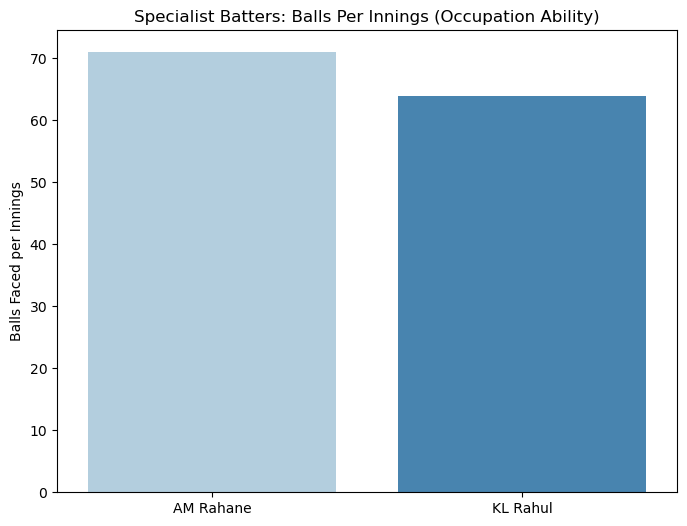

In [99]:
# Balls Per Innings--> Higher = more Test suitable

plt.figure(figsize=(8,6))
sns.barplot(data=specialist_batter, x='Player Name', y='Balls_per_innings', palette='Blues')

plt.ylabel('Balls Faced per Innings')
plt.title('Specialist Batters: Balls Per Innings (Occupation Ability)')
plt.xlabel('')
plt.show()


**Rahane highest, KL Rahul least defensive**

In [100]:
# Conversion Ability (100s per Innings)
specialist_batter['100s_Per_Innings'] = (specialist_batter['100'] / specialist_batter['Innings'])*100
specialist_batter

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year,Balls_per_innings,100s_Per_Innings
2,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022,71,8.571429
4,KL Rahul,45,78,2,2604,199,34.26,5001,52.06,7,13,7,317,17,RHB,2014,2022,64,8.974359


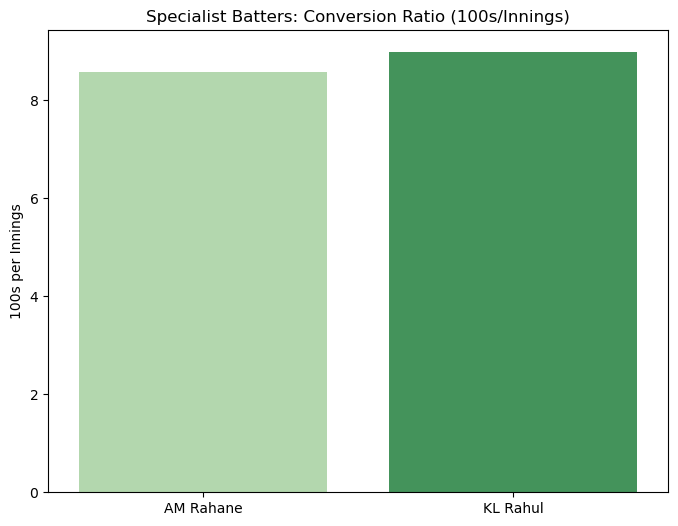

In [101]:
plt.figure(figsize=(8,6))
sns.barplot(data=specialist_batter, x='Player Name', y='100s_Per_Innings', palette='Greens')

plt.ylabel('100s per Innings')
plt.title('Specialist Batters: Conversion Ratio (100s/Innings)')
plt.xlabel('')
plt.show()

**Rahane wins this metric (12/140 Innings) , as rahul played less innings than rahane we consider rahane as the best consering the Innings he played.**

## <span style="color:red; font-weight:bold;">Final Summary of `Specialist Batter` selection:</span>
**`Ajinkya Rahane` is preferred because he has a better Test average, converts more innings into big scores, and spends longer time at the crease, making him a more dependable and consistent batter in the longer format.**


**`KL Rahul` is kept as the substitute because he still has the potential and versatility to step in when needed, but his lower average and inconsistency compared to Rahane make him less reliable as the primary option.**

In [102]:
elite_bowlers

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,R Ashwin,76,143,3264.5,693,8870,386,7/59,13/140,22.97,2.71,50.7,25,6,2013,2022,5,2,Off-spin,Right-arm
1,RA Jadeja,59,112,2388.3,584,5863,239,7/48,10/154,24.53,2.45,59.9,10,1,2013,2022,4,2,Orthodox Spin,Left-arm
2,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm
3,JJ Bumrah,30,58,1044.4,254,2815,128,6/27,9/86,21.99,2.69,48.9,8,0,2018,2022,4,2,Fast,Right-arm
4,AR Patel,8,16,290.2,70,672,47,6/38,11/70,14.29,2.31,37.0,5,1,2021,2022,5,2,Orthodox Spin,Left-arm
5,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm
6,Kuldeep Yadav,8,14,213.1,33,733,34,5/40,8/113,21.55,3.43,37.6,3,0,2017,2022,4,2,Wrist Spin (Chinaman),Left-arm


**There are only 3 Players left to choose with --> Axar,Kuldeep and Siraj**

In [103]:
specialist_bowler=elite_bowlers[elite_bowlers['Player Name'].isin(['AR Patel','Mohammed Siraj','Kuldeep Yadav'])]
specialist_bowler

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
4,AR Patel,8,16,290.2,70,672,47,6/38,11/70,14.29,2.31,37.0,5,1,2021,2022,5,2,Orthodox Spin,Left-arm
5,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm
6,Kuldeep Yadav,8,14,213.1,33,733,34,5/40,8/113,21.55,3.43,37.6,3,0,2017,2022,4,2,Wrist Spin (Chinaman),Left-arm


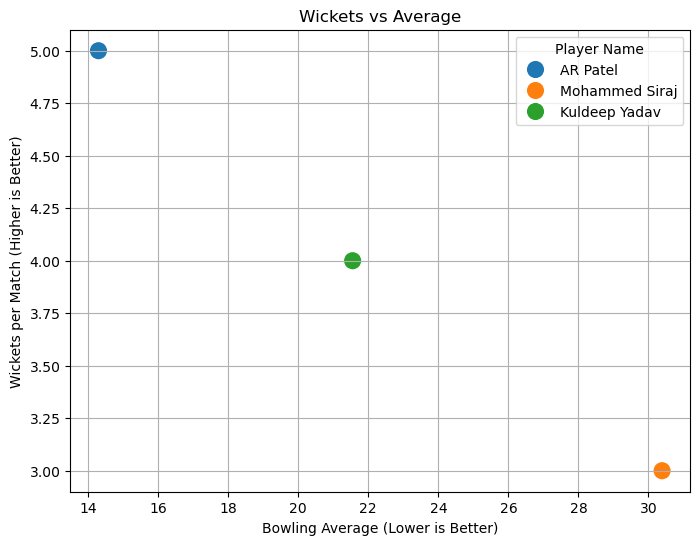

In [104]:
# Wickets per Match vs Bowling Average

plt.figure(figsize=(8,6))
sns.scatterplot(data=specialist_bowler, x='Avg', y='Wkts_per_Match', hue='Player Name', s=180)

plt.xlabel('Bowling Average (Lower is Better)')
plt.ylabel('Wickets per Match (Higher is Better)')
plt.title('Wickets vs Average')
plt.grid(True)
plt.show()

**Siraj (Avg near 30 & Wkts/Match ~3) → Strike Pace, Axar (Avg < 20 & Wkts/Match high) → Control + Spin, Kuldeep (Avg low, Wkts/Match medium) → Attacking spin, less control**

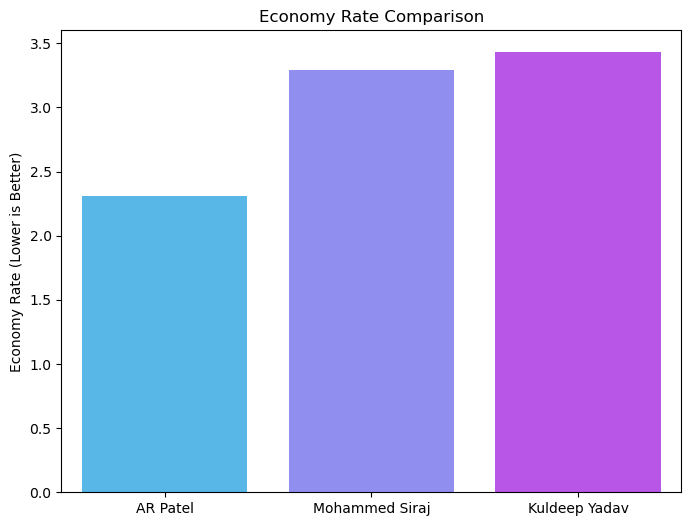

In [105]:
# Economy Rate Comparison

plt.figure(figsize=(8,6))
sns.barplot(data=specialist_bowler, x='Player Name', y='Econ Rate', palette='cool')

plt.xlabel('Player')
plt.ylabel('Economy Rate (Lower is Better)')
plt.title('Economy Rate Comparison')
plt.xlabel('')
plt.show()


**Axar likely best control (lowest Econ), Siraj moderate, Kuldeep slightly expensive**

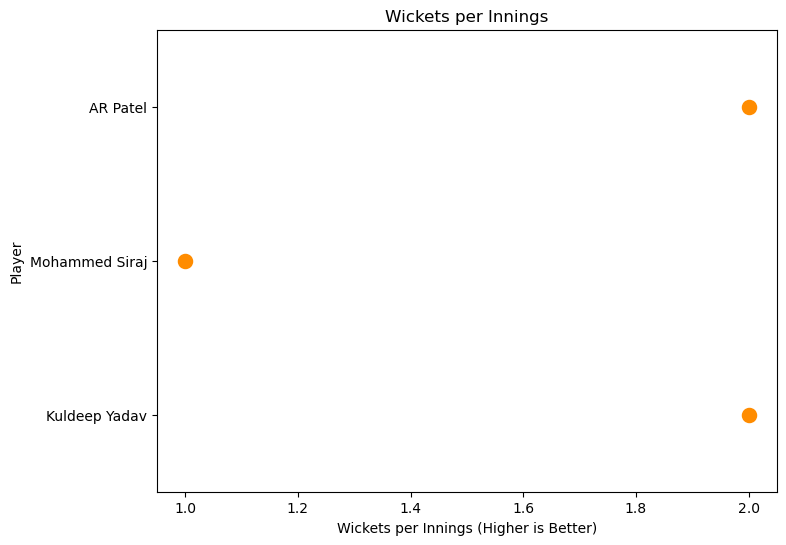

In [106]:
# Wickets per Innings

plt.figure(figsize=(8,6))
sns.pointplot(data=specialist_bowler, x='Wkts_per_Innings', y='Player Name', color='darkorange', join=False, markers='o', scale=1.5)

plt.xlabel('Wickets per Innings (Higher is Better)')
plt.ylabel('Player')
plt.title('Wickets per Innings')
plt.show()

## <span style="color:red; font-weight:bold;">Final Summary of `Specialist Bowler` selection:</span> 
**With two quality spinners already in the squad, the best option is to strengthen the pace attack. Based on impact (wickets vs average), control (economy), and reliability (wickets per innings), **`Mohammed Siraj`** is the ideal **`specialist bowler`** due to his strike ability and new-ball threat.**

  
  
****`Axar Patel`** is kept as the **`substitute`** for his excellent control and usefulness on spin-friendly pitches.**

# <span style="background-color:white; color:black;">So Our Final Best Test Team Based On Evidence Based Anlaysis is:</span>

In [146]:
# Pulling out the selected Batters from the batters dataset.

top_order=df_batters[df_batters['Player Name'].isin(['Rohit Sharma','MA Agarwal','CA Pujara', 'V Kohli','AM Rahane','Rishab Pant'])].reset_index(drop=True)
top_order =top_order.reindex([3,5,1,0,2,4]).reset_index(drop=True)
top_order

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,50,0,4s,6s,Batting_Style,Start_Year,End_Year
0,Rohit Sharma,45,77,9,3137,212,46.13,5625,55.76,8,14,4,335,64,RHB,2013,2022
1,MA Agarwal,21,36,0,1488,243,41.33,2782,53.48,4,6,1,189,28,RHB,2018,2022
2,CA Pujara,89,153,8,6253,204,43.12,14212,43.99,16,33,11,755,14,RHB,2013,2022
3,V Kohli,90,152,9,7228,254,50.54,12681,56.99,24,23,12,809,20,RHB,2013,2022
4,AM Rahane,82,140,12,4931,188,38.52,9972,49.44,12,25,10,560,34,RHB,2013,2022
5,Rishab Pant,33,56,4,2271,159,43.67,3084,73.63,5,11,2,246,55,LHB,2018,2022


In [147]:
# Pulling out the selected Allrounders from the allrounders dataset

allrounders=df_allrounders[df_allrounders['Player Name'].isin(['R Ashwin','RA Jadeja'])].reset_index(drop=True)
allrounders

,Player Name,Matches,Runs,Highest Score,Batting Avg,100,Wkts,Best Bowling(Innings),Bowling Avg,5w in an Innings,Catches Taken,Stumpings Made,Avg Diff,Start_year,End_year,Bat_Runs_per_Match,Wkts_per_Match,Catches_per_Match
0,R Ashwin,76,2447,124,24.96,4,386,7/59,22.97,25,29,0,1.99,2013,2022,32,5,0
1,RA Jadeja,59,2511,175,36.92,3,239,7/48,24.53,10,39,0,12.39,2013,2022,42,4,0


In [148]:
# Pulling out the selected Bowlers from the bowlers dataset.

bowling_order=df_bowlers[df_bowlers['Player Name'].isin(['JJ Bumrah','UT Yadav','Mohammed Siraj'])].reset_index(drop=True)
bowling_order=bowling_order.reindex([1,0,2]).reset_index(drop=True)
bowling_order

,Player Name,Matches,Innings,Overs,Maidens,Runs,Wickets,Best Bowling(Innings),Best Bowling(Match),Avg,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,JJ Bumrah,30,58,1044.4,254,2815,128,6/27,9/86,21.99,2.69,48.9,8,0,2018,2022,4,2,Fast,Right-arm
1,UT Yadav,45,90,1172.0,210,3944,133,6/88,10/133,29.65,3.36,52.8,2,1,2014,2022,2,1,Fast,Right-arm
2,Mohammed Siraj,15,29,423.4,82,1398,46,5/73,8/126,30.39,3.29,55.2,1,0,2020,2022,3,1,Fast,Right-arm


## `Substitutes/Reserved-Players:`
#### It is not necessary to include four substitutes. For team balance, two specialized backups — one batter and one bowler(can bat as well) — are sufficient, as the rest of the roles are already covered by the selected playing XI.

In [111]:
batting_sub=df_batters[df_batters['Player Name']=='KL Rahul'] # can also be replaced as wicketkeeper.
bowling_sub=df_bowlers[df_bowlers['Player Name']=='AR Patel'] # can also be replaced as allrounder.

In [112]:
# Concatinating player "Rahul" and "Axar" from two different dataframes which they belong to, as they are reserved players of the team.

reserved_players=pd.concat([df_batters[df_batters['Player Name']=='KL Rahul'],df_bowlers[df_bowlers['Player Name']=='AR Patel']],ignore_index=True)
reserved_players.index=[np.arange(1,3)]

reserved_players

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,...,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
1,KL Rahul,45,78,2.0,2604,199.0,34.26,5001.0,52.06,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AR Patel,8,16,NaN,672,NaN,14.29,NaN,NaN,NaN,...,2.31,37.0,5.0,1.0,2021.0,2022.0,5.0,2.0,Orthodox Spin,Left-arm


### Concating the Dataframes of Batters,Bowlers and Allrounders to establish the Final Team

In [150]:
final_team = pd.concat([top_order, allrounders, bowling_order],ignore_index=True)
final_team

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,...,Overs,Maidens,Wickets,Best Bowling(Match),Econ Rate,Bowling Strike Rate,10w in a Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,Rohit Sharma,45,77.0,9.0,3137,212.0,46.13,5625.0,55.76,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MA Agarwal,21,36.0,0.0,1488,243.0,41.33,2782.0,53.48,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA Pujara,89,153.0,8.0,6253,204.0,43.12,14212.0,43.99,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V Kohli,90,152.0,9.0,7228,254.0,50.54,12681.0,56.99,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AM Rahane,82,140.0,12.0,4931,188.0,38.52,9972.0,49.44,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Rishab Pant,33,56.0,4.0,2271,159.0,43.67,3084.0,73.63,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R Ashwin,76,NaN,NaN,2447,124.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,RA Jadeja,59,NaN,NaN,2511,175.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,JJ Bumrah,30,58.0,NaN,2815,NaN,21.99,NaN,NaN,NaN,...,1044.4,254.0,128.0,9/86,2.69,48.9,0.0,2.0,Fast,Right-arm
9,UT Yadav,45,90.0,NaN,3944,NaN,29.65,NaN,NaN,NaN,...,1172.0,210.0,133.0,10/133,3.36,52.8,1.0,1.0,Fast,Right-arm


In [ ]:
### Saving te=he Team into `Csv` 

In [154]:
final_team.to_csv('Best_Test_11.csv',index=False)

In [152]:
reserved_players.to_csv('Reserve_Players.csv',index=False)

In [155]:
best_11=pd.read_csv('Best_Test_11.csv')
best_11

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,...,Overs,Maidens,Wickets,Best Bowling(Match),Econ Rate,Bowling Strike Rate,10w in a Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,Rohit Sharma,45,77.0,9.0,3137,212.0,46.13,5625.0,55.76,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MA Agarwal,21,36.0,0.0,1488,243.0,41.33,2782.0,53.48,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CA Pujara,89,153.0,8.0,6253,204.0,43.12,14212.0,43.99,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,V Kohli,90,152.0,9.0,7228,254.0,50.54,12681.0,56.99,24.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AM Rahane,82,140.0,12.0,4931,188.0,38.52,9972.0,49.44,12.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Rishab Pant,33,56.0,4.0,2271,159.0,43.67,3084.0,73.63,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,R Ashwin,76,NaN,NaN,2447,124.0,NaN,NaN,NaN,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,RA Jadeja,59,NaN,NaN,2511,175.0,NaN,NaN,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,JJ Bumrah,30,58.0,NaN,2815,NaN,21.99,NaN,NaN,NaN,...,1044.4,254.0,128.0,9/86,2.69,48.9,0.0,2.0,Fast,Right-arm
9,UT Yadav,45,90.0,NaN,3944,NaN,29.65,NaN,NaN,NaN,...,1172.0,210.0,133.0,10/133,3.36,52.8,1.0,1.0,Fast,Right-arm


In [156]:
reserved=pd.read_csv('Reserve_Players.csv')
reserved

,Player Name,Matches,Innings,Not Outs,Runs,Highest Score,Avg,Balls Faced,Strike Rate,100,...,Econ Rate,Bowling Strike Rate,5w in an Innings,10w in a Match,Start_year,End_year,Wkts_per_Match,Wkts_per_Innings,Bowling Style,Bowling Arm
0,KL Rahul,45,78,2.0,2604,199.0,34.26,5001.0,52.06,7.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AR Patel,8,16,NaN,672,NaN,14.29,NaN,NaN,NaN,...,2.31,37.0,5.0,1.0,2021.0,2022.0,5.0,2.0,Orthodox Spin,Left-arm
